In [ ]:
%matplotlib inline
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)


In [ ]:
!jupyter nbextension enable --py widgetsnbextension --sys-prefix


Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/usr/etc/jupyter/nbconfig/notebook.json


In [ ]:
!pip install --upgrade plotly jupyter


In [ ]:
import plotly.io as pio
pio.renderers.default = 'browser'  # or 'svg' / 'chrome' / etc.


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

=== Step 1: Fetching Data ===
Fetching data for EURUSD=X from 2000-01-01 to 2025-01-31 ...
Saved EURUSD.csv to data/
Fetching data for GC=F from 2000-01-01 to 2025-01-31 ...


Saved Gold.csv to data/
Data fetching completed and saved to CSV.

=== Loading & Preprocessing ===

Loaded EURUSD.csv with shape (5493, 5)

Loaded Gold.csv with shape (6127, 5)

=== Step 2: Preprocessing Data ===
Saved EURUSD_features.csv to data/
Saved Gold_features.csv to data/

Loaded EURUSD_features.csv with shape (5491, 14)

Loaded Gold_features.csv with shape (6127, 14)

=== EDA for EURUSD ===
Head:
                Close      High       Low      Open  Volume  MA_20  MA_50  \
Date                                                                       
2003-12-01  1.196501  1.204007  1.194401  1.203398       0    NaN    NaN   
2003-12-02  1.208897  1.210903  1.194600  1.196101       0    NaN    NaN   
2003-12-03  1.212298  1.213003  1.207700  1.209000       0    NaN    NaN   
2003-12-04  1.208094  1.214403  1.204398  1.212004       0    NaN    NaN   
2003-12-05  1.218695  1.219096  1.206593  1.207802       0    NaN    NaN   

                   RSI  Bollinger_Upper  Bollinger_Lower 

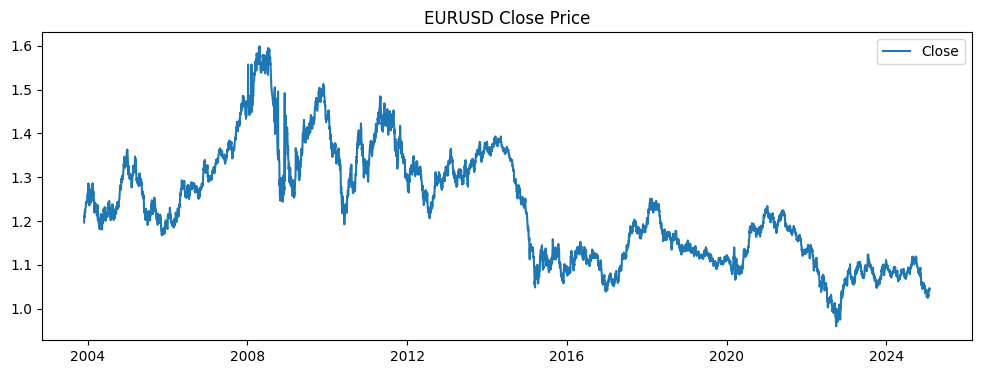


=== EDA for Gold ===
Head:
                  Close        High         Low        Open  Volume  MA_20  \
Date                                                                        
2000-08-30  273.899994  273.899994  273.899994  273.899994       0    NaN   
2000-08-31  278.299988  278.299988  274.799988  274.799988       0    NaN   
2000-09-01  277.000000  277.000000  277.000000  277.000000       0    NaN   
2000-09-05  275.799988  275.799988  275.799988  275.799988       2    NaN   
2000-09-06  274.200012  274.200012  274.200012  274.200012       0    NaN   

            MA_50         RSI  Bollinger_Upper  Bollinger_Lower      MACD  \
Date                                                                        
2000-08-30    NaN         NaN              NaN              NaN  0.000000   
2000-08-31    NaN  100.000000              NaN              NaN  0.350997   
2000-09-01    NaN   97.777795              NaN              NaN  0.518291   
2000-09-05    NaN   95.664472              NaN

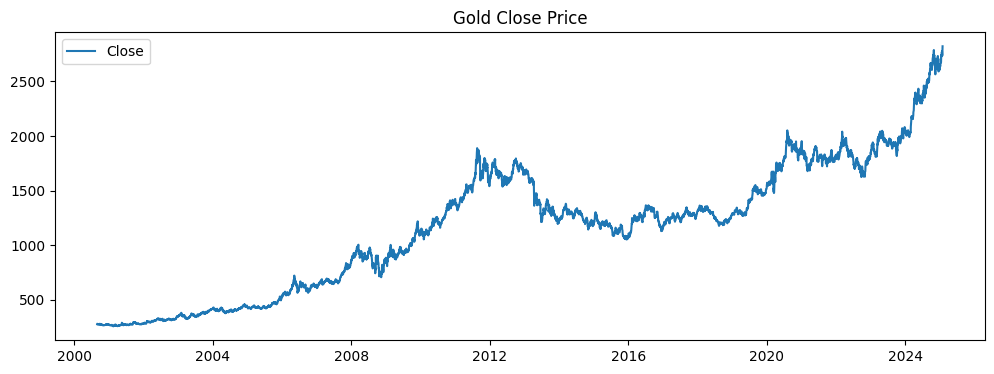


=== Market Analysis ===
Correlation between EURUSD & Gold: -0.4264

Granger causality test (max_lag=5):
  Lag 1: p-value = 0.0676
  Lag 2: p-value = 0.0000
  Lag 3: p-value = 0.0000
  Lag 4: p-value = 0.0000
  Lag 5: p-value = 0.0000

Cointegration test: t-stat=-2.5277, p-value=0.2670


=== Step 5: Modeling & Prediction ===
Train size: 4353, Test size: 1089
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
ARIMA -> RMSE: 0.1063, MAE: 0.0931, R2: -2.1629
RF    -> RMSE: 0.0182, MAE: 0.0094, R2: 0.9073
LSTM  -> RMSE: 0.0196, MAE: 0.0154, R2: 0.8927
Ensemble(ARIMA,RF) -> RMSE: 0.0593, MAE: 0.0498, R2: 0.0165

Trend-Following Backtest:
  Sharpe: 0.1353, MaxDD: 0.1631, CAGR: 0.75%

=== Step 8: Visualization & Reporting ===



Backtest Results:
Sharpe: 0.1353, MaxDD: 0.1631, CAGR: 0.75%


In [ ]:
# Install necessary packages
!pip install yfinance xgboost catboost lightgbm shap plotly statsmodels tensorflow seaborn --quiet

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Data fetching
import yfinance as yf

# Preprocessing & EDA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import coint, grangercausalitytests
from scipy.stats import zscore

# Modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Explainability
import shap

# Suppress warnings for clarity
import warnings
warnings.filterwarnings("ignore")

# To display Plotly plots in notebooks
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Global Configs
# DATA_DIR = "data"  # Directory to store CSV/data files

###############################################################################
# 1. DATA FETCHING
###############################################################################

def fetch_data_from_yfinance(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    Generic function to fetch historical data (Forex, Commodity, Equity, etc.)
    from Yahoo Finance. Returns a date-indexed OHLCV DataFrame.
    """
    print(f"Fetching data for {ticker} from {start} to {end} ...")
    df = yf.download(ticker, start=start, end=end)
    if df.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    df.index = pd.to_datetime(df.index)

    # Flatten columns if multi-indexed
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns.values]
    return df

def save_data_to_csv(df: pd.DataFrame, filename: str):
    """
    Save DataFrame to CSV in the 'data' folder.
    """
    if not os.path.exists(DATA_DIR):
        os.makedirs(DATA_DIR)
    file_path = os.path.join(DATA_DIR, filename)
    df.to_csv(file_path)
    print(f"Saved {filename} to {DATA_DIR}/")

def load_data_from_csv(filename: str) -> pd.DataFrame:
    """
    Load a CSV file into a pandas DataFrame from the data folder.
    Includes cleaning of column names and basic checks.
    """
    file_path = os.path.join(DATA_DIR, filename)
    if not os.path.exists(file_path):
        print(f"File {filename} does not exist in {DATA_DIR}. Returning empty DataFrame.")
        return pd.DataFrame()

    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    print(f"\nLoaded {filename} with shape {df.shape}")

    # Clean column names (remove trailing spaces, etc.)
    df.columns = df.columns.str.strip()

    # If columns have ticker suffixes, remove them
    rename_map = {}
    for col in df.columns:
        # Example: "Close_EURUSD=X" -> "Close"
        if '_' in col and ('=X' in col or '=F' in col):
            main_col = col.split('_')[0]  # e.g. "Close"
            rename_map[col] = main_col
        else:
            rename_map[col] = col
    df.rename(columns=rename_map, inplace=True)

    # Convert typical OHLCV columns to numeric, if any
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Drop rows with NaN in Close
    if 'Close' in df.columns:
        before = len(df)
        df.dropna(subset=['Close'], inplace=True)
        after = len(df)
        if before != after:
            print(f"Dropped {before - after} rows due to NaN in 'Close' column.")
    return df

def main_data_fetching():
    """
    Main function to fetch Forex/commodity data from Yahoo Finance.
    Extends date range for more data.
    """
    print("=== Step 1: Fetching Data ===")
    # Example date range: from 2000-01-01 to today's date
    start_date = "2000-01-01"
    end_date = datetime.now().strftime("%Y-%m-%d")

    # Fetch EUR/USD (ticker: "EURUSD=X")
    try:
        eurusd_df = fetch_data_from_yfinance("EURUSD=X", start=start_date, end=end_date)
        save_data_to_csv(eurusd_df, "EURUSD.csv")
    except Exception as e:
        print(f"Error fetching EUR/USD data: {e}")

    # Fetch Gold (ticker: "GC=F")
    try:
        gold_df = fetch_data_from_yfinance("GC=F", start=start_date, end=end_date)
        save_data_to_csv(gold_df, "Gold.csv")
    except Exception as e:
        print(f"Error fetching Gold data: {e}")

    # -- Optional: Fetch more Forex pairs or commodities in batch --
    """
    tickers = ["GBPUSD=X", "USDJPY=X", "CL=F"]  # example: Pound/USD, USD/JPY, Crude Oil
    for t in tickers:
        try:
            df_temp = fetch_data_from_yfinance(t, start=start_date, end=end_date)
            save_data_to_csv(df_temp, f"{t.replace('=','_')}.csv")
        except Exception as e:
            print(f"Error fetching {t}: {e}")
    """

    print("Data fetching completed and saved to CSV.")


###############################################################################
# 2. DATA PREPROCESSING
###############################################################################

def clean_and_preprocess_data(df: pd.DataFrame,
                              fill_method: str = 'ffill',
                              drop_duplicates: bool = True,
                              remove_outliers_zscore: float = None,
                              scale_method: str = None) -> pd.DataFrame:
    """
    Clean and preprocess data:
        - Remove duplicates
        - Fill missing values
        - Optional outlier removal
        - Optional scaling
    """
    df = df.copy()

    # Remove duplicates by index
    if drop_duplicates:
        df = df[~df.index.duplicated(keep='first')]

    # Fill missing values
    if fill_method == 'ffill':
        df.fillna(method='ffill', inplace=True)
    elif fill_method == 'bfill':
        df.fillna(method='bfill', inplace=True)
    elif fill_method == 'mean':
        df.fillna(df.mean(), inplace=True)

    # Optional outlier removal
    if remove_outliers_zscore is not None:
        numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Volume', errors='ignore')
        if len(numeric_cols) > 0:
            z_scores = np.abs(zscore(df[numeric_cols]))
            z_scores = np.nan_to_num(z_scores, nan=np.inf, posinf=np.inf, neginf=np.inf)
            df = df[(z_scores < remove_outliers_zscore).all(axis=1)]

    # Optional scaling
    if scale_method:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if scale_method == 'standard':
            scaler = StandardScaler()
            df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
        elif scale_method == 'minmax':
            scaler = MinMaxScaler()
            df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

    return df

def add_technical_indicators(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add a few common technical indicators:
     - Moving Averages (20, 50)
     - RSI
     - Bollinger Bands
     - MACD, Signal
     - Daily Returns, Rolling Volatility
    """
    df = df.copy()

    if 'Close' not in df.columns:
        print("No 'Close' column found. Cannot add technical indicators.")
        return df

    # Moving Averages
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()

    # RSI
    window_length = 14
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ema_up = up.ewm(com=window_length - 1, adjust=False).mean()
    ema_down = down.ewm(com=window_length - 1, adjust=False).mean()
    rs = ema_up / ema_down
    df['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands (20, 2)
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

    # MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Daily Returns & Volatility
    df['Returns'] = df['Close'].pct_change()
    df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(20)

    return df

def main_data_preprocessing(eurusd_df, gold_df):
    """
    Preprocess data for both EURUSD and Gold:
      - Clean
      - (Optional) outlier removal, scaling
      - Technical indicators
      - Save to CSV
    """
    print("\n=== Step 2: Preprocessing Data ===")

    # 1) EUR/USD
    eurusd_cleaned = clean_and_preprocess_data(
        eurusd_df,
        fill_method='ffill',
        drop_duplicates=True,
        remove_outliers_zscore=3.0,  # Remove extreme outliers if needed
        scale_method=None
    )
    eurusd_features = add_technical_indicators(eurusd_cleaned)
    eurusd_features.dropna(subset=['Close'], inplace=True)
    save_data_to_csv(eurusd_features, "EURUSD_features.csv")

    # 2) Gold
    gold_cleaned = clean_and_preprocess_data(
        gold_df,
        fill_method='ffill',
        drop_duplicates=True,
        remove_outliers_zscore=3.0,
        scale_method=None
    )
    gold_features = add_technical_indicators(gold_cleaned)
    gold_features.dropna(subset=['Close'], inplace=True)
    save_data_to_csv(gold_features, "Gold_features.csv")


###############################################################################
# 3. EXPLORATORY DATA ANALYSIS (EDA)
###############################################################################

def exploratory_data_analysis(df: pd.DataFrame, asset_name: str):
    """
    Basic EDA with descriptive stats, correlation, close price plot.
    """
    if df.empty:
        print(f"{asset_name} DataFrame is empty. Skipping EDA.")
        return

    print(f"\n=== EDA for {asset_name} ===")
    print("Head:\n", df.head())
    print("\nStats:\n", df.describe())

    # Simple Close Price Plot
    plt.figure(figsize=(12, 4))
    plt.plot(df.index, df['Close'], label='Close')
    plt.title(f'{asset_name} Close Price')
    plt.legend()
    plt.show()

    # Correlation Matrix
    corr = df.corr(numeric_only=True)
    fig = px.imshow(corr, text_auto=True, aspect="auto", title=f"{asset_name} Correlation Matrix")
    fig.show()


###############################################################################
# 4. MARKET ANALYSIS (Granger, Cointegration, etc.)
###############################################################################

def market_analysis(df1: pd.DataFrame,
                    df2: pd.DataFrame,
                    col_name: str = "Close",
                    label1: str = "EURUSD",
                    label2: str = "Gold"):
    """
    Relationship analysis: correlation, Granger causality, cointegration.
    """
    print("\n=== Market Analysis ===")
    merged = pd.DataFrame()
    merged[label1] = df1[col_name]
    merged[label2] = df2[col_name]
    merged.dropna(inplace=True)

    if merged.empty:
        print("Merged DataFrame is empty; cannot analyze.")
        return

    # Pearson Correlation
    corr_val = merged.corr().iloc[0, 1]
    print(f"Correlation between {label1} & {label2}: {corr_val:.4f}")

    # Granger Causality
    max_lag = 5
    print(f"\nGranger causality test (max_lag={max_lag}):")
    try:
        results = grangercausalitytests(merged[[label1, label2]], maxlag=max_lag, verbose=False)
        for lag, res in results.items():
            p_value = res[0]['ssr_ftest'][1]
            print(f"  Lag {lag}: p-value = {p_value:.4f}")
    except Exception as e:
        print(f"Error in Granger causality: {e}")

    # Cointegration
    try:
        coint_score, p_value, _ = coint(merged[label1], merged[label2])
        print(f"\nCointegration test: t-stat={coint_score:.4f}, p-value={p_value:.4f}\n")
    except Exception as e:
        print(f"Error in cointegration test: {e}")


###############################################################################
# 5. MODELING & PREDICTION
###############################################################################

def train_test_split_time_series(df, test_size=0.2):
    """
    Time-based split.
    """
    split_index = int(len(df) * (1 - test_size))
    train_df = df.iloc[:split_index].copy()
    test_df = df.iloc[split_index:].copy()
    return train_df, test_df

def evaluate_predictions(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# ----- Statistical Models ----- #
def arima_model(train, test, order=(1,1,1), col_name='Close'):
    model = ARIMA(train[col_name], order=order).fit()
    preds = model.forecast(steps=len(test))
    return preds

# ----- ML Models ----- #
def random_forest_model(train, test, features, target='Close'):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(train[features], train[target])
    preds = rf.predict(test[features])
    return preds


# ----- Deep Learning (LSTM) ----- #
def prepare_sequence_data(df, features, target, window_size=10):
    """
    Transform features into time windows for LSTM/GRU.
    """
    X_list, y_list = [], []
    for i in range(window_size, len(df)):
        X_list.append(df[features].iloc[i-window_size:i].values)
        y_list.append(df[target].iloc[i])
    return np.array(X_list), np.array(y_list)

def build_lstm(input_shape):
    """
    Build a simple LSTM model.
    Leverages GPU if available (TensorFlow automatically uses it if found).
    """
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def deep_learning_model(train, test, features, target='Close', epochs=10, window_size=10):
    """
    Example LSTM training & prediction.
    """
    # Prepare sequences
    X_train, y_train = prepare_sequence_data(train, features, target, window_size)
    X_test, y_test = prepare_sequence_data(test, features, target, window_size)

    model = build_lstm((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)  # verbose=1 for full logs

    preds = model.predict(X_test).flatten()
    return preds, y_test

# ---- Ensemble ---- #
def ensemble_predictions(pred_list, weights=None):
    """
    Combine multiple prediction arrays via weighted average.
    """
    preds_arr = np.array(pred_list)
    if weights is None:
        weights = [1.0 / len(pred_list)] * len(pred_list)
    return np.tensordot(preds_arr, weights, axes=((0), (0)))


def main_modeling(eurusd_df):
    """
    Demonstrates ARIMA, RandomForest, LSTM, and an ensemble.
    Returns test DF and predictions for downstream tasks (backtesting, etc.).
    """
    print("\n=== Step 5: Modeling & Prediction ===")
    if eurusd_df.empty or 'Close' not in eurusd_df.columns:
        print("EUR/USD DataFrame is empty or missing 'Close'. Skipping modeling.")
        return None, None, None, None, None

    # Pick features
    features = ['MA_20', 'MA_50', 'RSI', 'MACD', 'Signal', 'Volatility']
    # Ensure these features exist
    for f in features:
        if f not in eurusd_df.columns:
            print(f"Missing feature {f} in EURUSD DataFrame. Check preprocessing.")
            return None, None, None, None, None

    # Drop any NaNs
    eurusd_df.dropna(subset=features + ['Close'], inplace=True)

    # Time Split
    train_df, test_df = train_test_split_time_series(eurusd_df, test_size=0.2)
    print(f"Train size: {len(train_df)}, Test size: {len(test_df)}")

    # 1) ARIMA
    try:
        arima_preds = arima_model(train_df, test_df, order=(2,1,2), col_name='Close')
    except Exception as e:
        print(f"ARIMA failed: {e}")
        arima_preds = None

    # 2) Random Forest
    try:
        rf_preds = random_forest_model(train_df, test_df, features, target='Close')
    except Exception as e:
        print(f"RandomForest failed: {e}")
        rf_preds = None

    # 3) LSTM
    try:
        lstm_preds, y_test_lstm = deep_learning_model(
            train_df, test_df, features, target='Close', epochs=10, window_size=10
        )
        # Align test to LSTM output length
        # The first 10 test rows are lost to windowing
        aligned_test_df = test_df.iloc[10:].copy()
    except Exception as e:
        print(f"LSTM failed: {e}")
        lstm_preds, aligned_test_df, y_test_lstm = None, None, None

    # 4) Ensemble (ARIMA + RF)
    ensemble_preds = None
    if arima_preds is not None and rf_preds is not None:
        # If we have LSTM alignment, we should also align ARIMA & RF
        # to the same length (after the first 10 test rows) to combine them.
        if aligned_test_df is not None:
            arima_aligned = arima_preds[10:]
            rf_aligned = rf_preds[10:]
            ensemble_preds = ensemble_predictions([arima_aligned, rf_aligned], weights=[0.5, 0.5])
        else:
            ensemble_preds = ensemble_predictions([arima_preds, rf_preds], weights=[0.5, 0.5])

    # --- Evaluate Models ---
    # For ARIMA & RF, evaluate on full test set unless aligned
    if arima_preds is not None:
        if aligned_test_df is not None:
            a_rmse, a_mae, a_r2 = evaluate_predictions(aligned_test_df['Close'], arima_preds[10:])
        else:
            a_rmse, a_mae, a_r2 = evaluate_predictions(test_df['Close'], arima_preds)
        print(f"ARIMA -> RMSE: {a_rmse:.4f}, MAE: {a_mae:.4f}, R2: {a_r2:.4f}")

    if rf_preds is not None:
        if aligned_test_df is not None:
            rf_rmse, rf_mae, rf_r2 = evaluate_predictions(aligned_test_df['Close'], rf_preds[10:])
        else:
            rf_rmse, rf_mae, rf_r2 = evaluate_predictions(test_df['Close'], rf_preds)
        print(f"RF    -> RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R2: {rf_r2:.4f}")

    if lstm_preds is not None and y_test_lstm is not None:
        l_rmse, l_mae, l_r2 = evaluate_predictions(y_test_lstm, lstm_preds)
        print(f"LSTM  -> RMSE: {l_rmse:.4f}, MAE: {l_mae:.4f}, R2: {l_r2:.4f}")

    if ensemble_preds is not None:
        if aligned_test_df is not None:
            e_rmse, e_mae, e_r2 = evaluate_predictions(aligned_test_df['Close'], ensemble_preds)
            print(f"Ensemble(ARIMA,RF) -> RMSE: {e_rmse:.4f}, MAE: {e_mae:.4f}, R2: {e_r2:.4f}")

    # Return everything for backtesting
    final_test_df = aligned_test_df if aligned_test_df is not None else test_df
    return final_test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds


###############################################################################
# 6. STRATEGY DEVELOPMENT
###############################################################################

def trend_following_strategy(df: pd.DataFrame, short_window=20, long_window=50):
    """
    Simple trend-following: buy if short MA > long MA, else sell.
    """
    df = df.copy()
    if 'MA_20' not in df.columns or 'MA_50' not in df.columns:
        print("Missing MA_20 or MA_50 for trend-following strategy.")
        return df

    df['Signal'] = 0.0
    df['Signal'] = np.where(df['MA_20'] > df['MA_50'], 1.0, -1.0)
    df['Position'] = df['Signal'].shift(1).fillna(0)
    return df


###############################################################################
# 7. BACKTESTING
###############################################################################

def backtest_strategy(df: pd.DataFrame, col_close='Close', position_col='Position', transaction_cost=0.0001):
    """
    Vectorized backtest:
      - Market return
      - Strategy return
      - Transaction cost (simple)
      - Cumulative performance
      - Sharpe, maxDD, CAGR
    """
    df = df.copy()
    if col_close not in df.columns or position_col not in df.columns:
        print(f"Missing {col_close} or {position_col} in DataFrame. Cannot backtest.")
        return df, None, None, None

    df['Market_Return'] = df[col_close].pct_change().fillna(0)
    df['Strategy_Return'] = df[position_col] * df['Market_Return']
    # transaction costs on change in position
    df['Strategy_Return_After_Cost'] = df['Strategy_Return'] - transaction_cost * df[position_col].diff().abs().fillna(0)

    # Cumulative returns
    df['Cumulative_Market'] = (1 + df['Market_Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy_Return_After_Cost']).cumprod()

    # Sharpe
    daily_sr = df['Strategy_Return_After_Cost'].mean() / df['Strategy_Return_After_Cost'].std() if df['Strategy_Return_After_Cost'].std() != 0 else 0
    sharpe_ratio = daily_sr * np.sqrt(252)

    # Max Drawdown
    rolling_max = df['Cumulative_Strategy'].cummax()
    drawdown = rolling_max - df['Cumulative_Strategy']
    max_drawdown = drawdown.max()

    # CAGR
    total_days = (df.index[-1] - df.index[0]).days
    years = total_days / 365.25
    if years > 0 and df['Cumulative_Strategy'].iloc[0] != 0:
        cagr = (df['Cumulative_Strategy'].iloc[-1] / df['Cumulative_Strategy'].iloc[0]) ** (1 / years) - 1
    else:
        cagr = np.nan

    return df, sharpe_ratio, max_drawdown, cagr


###############################################################################
# 8. VISUALIZATION & REPORTING
###############################################################################

def visualization_and_reporting(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds, backtest_results):
    """
    Plot actual vs. predicted, residuals, backtest performance, etc.
    """
    print("\n=== Step 8: Visualization & Reporting ===")

    if test_df is None or test_df.empty or 'Close' not in test_df.columns:
        print("No valid test data to visualize.")
        return

    # Construct comparison DataFrame
    pred_df = pd.DataFrame({'Actual': test_df['Close']}, index=test_df.index)
    if arima_preds is not None and len(arima_preds) == len(test_df):
        pred_df['ARIMA'] = arima_preds
    if rf_preds is not None and len(rf_preds) == len(test_df):
        pred_df['RF'] = rf_preds
    if lstm_preds is not None and len(lstm_preds) == len(test_df):
        pred_df['LSTM'] = lstm_preds
    if ensemble_preds is not None and len(ensemble_preds) == len(test_df):
        pred_df['Ensemble'] = ensemble_preds

    # Plot Actual vs. Predicted
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=pred_df.index, y=pred_df['Actual'],
                             mode='lines', name='Actual'))
    for col in ['ARIMA', 'RF', 'LSTM', 'Ensemble']:
        if col in pred_df.columns:
            fig.add_trace(go.Scatter(x=pred_df.index, y=pred_df[col],
                                     mode='lines', name=col))
    fig.update_layout(title="Actual vs. Predicted (EURUSD)",
                      xaxis_title="Date", yaxis_title="Price")
    fig.show()

    # If backtest results exist, plot cumulative returns
    if backtest_results is not None and 'Cumulative_Market' in backtest_results.columns:
        fig = go.Figure()
        fig.add_trace(go.Scatter(x=backtest_results.index, y=backtest_results['Cumulative_Market'],
                                 mode='lines', name='Market'))
        fig.add_trace(go.Scatter(x=backtest_results.index, y=backtest_results['Cumulative_Strategy'],
                                 mode='lines', name='Strategy'))
        fig.update_layout(title="Strategy vs Market Cumulative Returns",
                          xaxis_title="Date", yaxis_title="Cumulative Returns")
        fig.show()

        # Print summary stats
        _, sharpe, max_dd, cagr = backtest_strategy(backtest_results)
        print(f"\nBacktest Results:\n"
              f"Sharpe: {sharpe:.4f}, MaxDD: {max_dd:.4f}, CAGR: {cagr*100:.2f}%")

    else:
        print("No backtest results to plot.")


###############################################################################
# 9. MAIN EXECUTION
###############################################################################

def main():
    # 1. Fetch Data
    main_data_fetching()

    # 2. Load & Preprocess
    print("\n=== Loading & Preprocessing ===")
    eurusd_df = load_data_from_csv("EURUSD.csv")
    gold_df = load_data_from_csv("Gold.csv")
    if eurusd_df.empty or gold_df.empty:
        print("One of the main DataFrames is empty. Check data fetching.")
        return

    main_data_preprocessing(eurusd_df, gold_df)

    # Reload the processed features
    eurusd_features = load_data_from_csv("EURUSD_features.csv")
    gold_features = load_data_from_csv("Gold_features.csv")

    # 3. EDA
    exploratory_data_analysis(eurusd_features, "EURUSD")
    exploratory_data_analysis(gold_features, "Gold")

    # 4. Market Analysis
    market_analysis(eurusd_features, gold_features, col_name="Close", label1="EURUSD", label2="Gold")

    # 5. Modeling
    test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds = main_modeling(eurusd_features)

    # 6. Example Strategy (Trend-Following) + 7. Backtesting
    if test_df is not None:
        strategy_df = trend_following_strategy(test_df)
        backtest_results, sharpe, max_dd, cagr = backtest_strategy(strategy_df)

        print(f"\nTrend-Following Backtest:\n"
              f"  Sharpe: {sharpe:.4f}, MaxDD: {max_dd:.4f}, CAGR: {cagr*100:.2f}%")
    else:
        backtest_results = None

    # 8. Visualization & Reporting
    visualization_and_reporting(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds, backtest_results)


# Execute main
if __name__ == "__main__":
    main()


[*********************100%***********************]  1 of 1 completed

=== Step 1: Fetching Data ===
Fetching EUR/USD data...
EURUSD Data Head:
            Close_EURUSD=X  High_EURUSD=X  Low_EURUSD=X  Open_EURUSD=X  \
Date                                                                     
2020-01-01        1.122083       1.122838      1.115947       1.122083   
2020-01-02        1.122083       1.122712      1.116682       1.121894   
2020-01-03        1.117144       1.118068      1.112570       1.117081   
2020-01-06        1.116196       1.120825      1.115810       1.116246   
2020-01-07        1.119799       1.119946      1.113487       1.119583   

            Volume_EURUSD=X  
Date                         
2020-01-01                0  
2020-01-02                0  
2020-01-03                0  
2020-01-06                0  
2020-01-07                0  
Close_EURUSD=X     float64
High_EURUSD=X      float64
Low_EURUSD=X       float64
Open_EURUSD=X      float64
Volume_EURUSD=X      int64
dtype: object



[*********************100%***********************]  1 of 1 completed


Saved EURUSD.csv to data/

Fetching Gold data...
Gold Data Head:
             Close_GC=F    High_GC=F     Low_GC=F    Open_GC=F  Volume_GC=F
Date                                                                       
2020-01-02  1524.500000  1528.699951  1518.000000  1518.099976          214
2020-01-03  1549.199951  1552.699951  1530.099976  1530.099976          107
2020-01-06  1566.199951  1580.000000  1560.400024  1580.000000          416
2020-01-07  1571.800049  1576.300049  1558.300049  1558.300049           47
2020-01-08  1557.400024  1604.199951  1552.300049  1579.699951          236
Close_GC=F     float64
High_GC=F      float64
Low_GC=F       float64
Open_GC=F      float64
Volume_GC=F      int64
dtype: object
Saved Gold.csv to data/
Data fetching completed and saved to CSV.

=== Step 2: Preprocessing Data ===
Loaded EURUSD.csv with shape (1305, 5)
Columns before cleaning: Index(['Close_EURUSD=X', 'High_EURUSD=X', 'Low_EURUSD=X', 'Open_EURUSD=X',
       'Volume_EURUSD=X'],
      

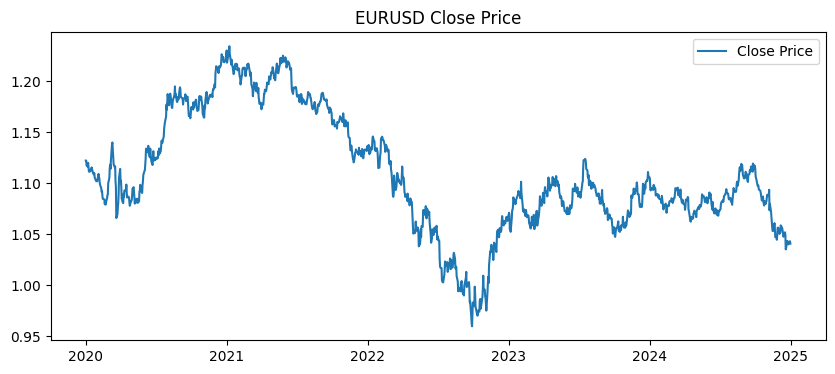


=== Step 4: Market Analysis ===
Loaded EURUSD_features.csv with shape (1305, 14)
Columns before cleaning: Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA_20', 'MA_50', 'RSI',
       'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal', 'Returns',
       'Volatility'],
      dtype='object')
First 5 rows before cleaning:
               Close      High       Low      Open  Volume  MA_20  MA_50  \
Date                                                                       
2020-01-01  1.122083  1.122838  1.115947  1.122083       0    NaN    NaN   
2020-01-02  1.122083  1.122712  1.116682  1.121894       0    NaN    NaN   
2020-01-03  1.117144  1.118068  1.112570  1.117081       0    NaN    NaN   
2020-01-06  1.116196  1.120825  1.115810  1.116246       0    NaN    NaN   
2020-01-07  1.119799  1.119946  1.113487  1.119583       0    NaN    NaN   

                  RSI  Bollinger_Upper  Bollinger_Lower      MACD    Signal  \
Date                                                       

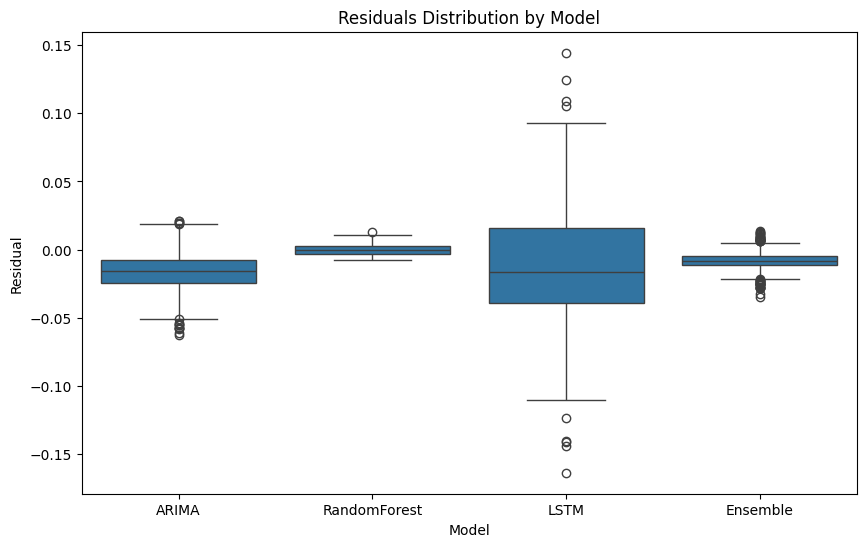

=== Strategy Report ===
Trend-Following Strategy Sharpe Ratio: -0.4720
Trend-Following Strategy Max Drawdown: 0.0901
Trend-Following Strategy CAGR: -3.0495%


In [ ]:
# Install necessary packages
!pip install yfinance xgboost catboost lightgbm shap plotly statsmodels tensorflow seaborn --quiet

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Data fetching
import yfinance as yf

# Preprocessing & EDA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import coint, grangercausalitytests
from scipy.stats import zscore

# Modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Explainability
import shap

# Suppress warnings for clarity
import warnings
warnings.filterwarnings("ignore")

# To display Plotly plots in notebooks
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Global Configs
# DATA_DIR = "data"

###############################################################################
# 1. DATA FETCHING
###############################################################################

def fetch_forex_data_from_yfinance(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    Fetch historical Forex or commodity data from Yahoo Finance (daily frequency by default).
    Args:
        ticker (str): e.g., "EURUSD=X" or "GC=F".
        start (str): Start date ("YYYY-MM-DD").
        end (str): End date ("YYYY-MM-DD").
    Returns:
        pd.DataFrame: Date-indexed OHLCV data.
    """
    df = yf.download(ticker, start=start, end=end)
    if df.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    df.index = pd.to_datetime(df.index)

    # Flatten columns if multi-indexed
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns.values]

    return df

def fetch_commodity_data_from_yfinance(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    Fetch historical commodity data (e.g., Gold, Silver, Oil) from Yahoo Finance.
    Args:
        ticker (str): Yahoo Finance ticker symbol (e.g., "GC=F" for Gold).
        start (str): Start date ("YYYY-MM-DD")
        end (str): End date ("YYYY-MM-DD")
    Returns:
        pd.DataFrame: Date-indexed dataframe of OHLCV data.
    """
    df = yf.download(ticker, start=start, end=end)
    if df.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    df.dropna(inplace=True)
    df.index = pd.to_datetime(df.index)

    # Flatten columns if multi-indexed
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns.values]

    return df

def save_data_to_csv(df: pd.DataFrame, filename: str):
    """
    Save the dataframe to CSV in the data folder.
    """
    if not os.path.exists(DATA_DIR):
        os.makedirs(DATA_DIR)
    file_path = os.path.join(DATA_DIR, filename)
    df.to_csv(file_path)
    print(f"Saved {filename} to {DATA_DIR}/")

def load_data_from_csv(filename: str) -> pd.DataFrame:
    """
    Load a CSV file into a pandas DataFrame from the data folder with debugging information.
    """
    file_path = os.path.join(DATA_DIR, filename)
    if not os.path.exists(file_path):
        print(f"File {filename} does not exist in {DATA_DIR}.")
        return pd.DataFrame()

    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    print(f"Loaded {filename} with shape {df.shape}")
    print("Columns before cleaning:", df.columns)
    print("First 5 rows before cleaning:")
    print(df.head())
    print("Data types before conversion:")
    print(df.dtypes)

    # Clean column names: strip whitespace
    df.columns = df.columns.str.strip()
    print("Columns after stripping:", df.columns)

    # Rename main columns by removing ticker suffix
    # Only rename columns that end with '=X' or '=F'
    rename_map = {}
    for col in df.columns:
        if '_' in col and ('=X' in col or '=F' in col):
            main_col = col.split('_')[0]
            rename_map[col] = main_col
        else:
            rename_map[col] = col
    df.rename(columns=rename_map, inplace=True)
    print("Columns after renaming:", df.columns)

    # Convert OHLCV columns to numeric
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for any remaining non-numeric columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    if len(non_numeric_cols) > 0:
        print(f"Non-numeric columns after conversion: {list(non_numeric_cols)}")

    # Drop rows that cannot be converted (NaNs in 'Close')
    df_before = df.shape[0]
    if 'Close' in df.columns:
        df.dropna(subset=['Close'], inplace=True)
    else:
        print("Warning: 'Close' column not found. Skipping dropna based on 'Close'.")
    df_after = df.shape[0]
    print(f"Dropped {df_before - df_after} rows due to NaN in 'Close'")
    print(f"After conversion and dropping NaNs, {filename} has shape {df.shape}")

    return df

def main_data_fetching():
    """
    Main function to fetch Forex and commodity data from Yahoo Finance.
    Saves data as CSV files in the 'data' folder.
    """
    print("=== Step 1: Fetching Data ===")
    # Example: Fetch EUR/USD Forex pair (Yahoo Finance ticker: "EURUSD=X")
    print("Fetching EUR/USD data...")
    try:
        eurusd_df = fetch_forex_data_from_yfinance("EURUSD=X", start="2020-01-01", end="2025-01-01")
        print("EURUSD Data Head:")
        print(eurusd_df.head())
        print(eurusd_df.dtypes)
        save_data_to_csv(eurusd_df, "EURUSD.csv")
    except Exception as e:
        print(f"Error fetching EUR/USD data: {e}")

    # Fetch Gold (GC=F) from Yahoo Finance
    print("\nFetching Gold data...")
    try:
        gold_df = fetch_commodity_data_from_yfinance("GC=F", start="2020-01-01", end="2025-01-01")
        print("Gold Data Head:")
        print(gold_df.head())
        print(gold_df.dtypes)
        save_data_to_csv(gold_df, "Gold.csv")
    except Exception as e:
        print(f"Error fetching Gold data: {e}")

    print("Data fetching completed and saved to CSV.")

###############################################################################
# 2. DATA PREPROCESSING
###############################################################################

def clean_and_preprocess_data(df: pd.DataFrame,
                              fill_method: str = 'ffill',
                              drop_duplicates: bool = True,
                              remove_outliers_zscore: float = None,
                              scale_method: str = None) -> pd.DataFrame:
    """
    Clean and preprocess data by handling missing values, duplicates, outliers, and optional scaling.
    Args:
        df (pd.DataFrame): Raw input data.
        fill_method (str): Method for filling missing values ('ffill', 'bfill', 'mean').
        drop_duplicates (bool): Whether to drop duplicate rows.
        remove_outliers_zscore (float): Z-score threshold for outlier removal. If None, skip.
        scale_method (str): 'standard' for StandardScaler, 'minmax' for MinMaxScaler, or None.
    Returns:
        pd.DataFrame: Preprocessed data.
    """
    df = df.copy()
    print("\n=== Data Preprocessing ===")

    # Handle duplicates
    if drop_duplicates:
        before_dup = df.shape[0]
        df = df[~df.index.duplicated(keep='first')]
        after_dup = df.shape[0]
        print(f"Dropped {before_dup - after_dup} duplicate rows based on index.")

    # Fill missing values
    print(f"Filling missing values using method: {fill_method}")
    if fill_method == 'ffill':
        df.fillna(method='ffill', inplace=True)
    elif fill_method == 'bfill':
        df.fillna(method='bfill', inplace=True)
    elif fill_method == 'mean':
        df.fillna(df.mean(), inplace=True)
    else:
        print("No filling method applied.")

    # Remove outliers
    if remove_outliers_zscore is not None:
        print(f"Removing outliers based on z-score threshold: {remove_outliers_zscore}")
        # Exclude 'Volume' from outlier removal to prevent removal based on low variance
        numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Volume', errors='ignore')
        if len(numeric_cols) == 0:
            print("No numeric columns available for outlier removal.")
        else:
            z_scores = np.abs(zscore(df[numeric_cols]))
            # Replace inf or NaN z-scores with high value to exclude them
            z_scores = np.nan_to_num(z_scores, nan=np.inf, posinf=np.inf, neginf=np.inf)
            # Keep rows where all z-scores are below the threshold
            before_outlier = df.shape[0]
            df = df[(z_scores < remove_outliers_zscore).all(axis=1)]
            after_outlier = df.shape[0]
            print(f"Removed {before_outlier - after_outlier} outlier rows based on z-score.")

    # Scale data
    if scale_method is not None:
        print(f"Scaling data using method: {scale_method}")
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) == 0:
            print("No numeric columns available for scaling.")
        else:
            if scale_method == 'standard':
                scaler = StandardScaler()
                df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            elif scale_method == 'minmax':
                scaler = MinMaxScaler()
                df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            else:
                print("No scaling method applied.")

    print("Data cleaning and preprocessing completed.")
    return df

def add_technical_indicators(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add common technical indicators (MA, RSI, Bollinger Bands, MACD, etc.)
    to the dataframe. Assumes 'Close' column exists.
    """
    df = df.copy()
    print("\nAdding technical indicators...")

    # Moving Averages
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()

    # RSI
    window_length = 14
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ema_up = up.ewm(com=window_length - 1, adjust=False).mean()
    ema_down = down.ewm(com=window_length - 1, adjust=False).mean()
    rs = ema_up / ema_down
    df['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

    # MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Returns & Volatility
    df['Returns'] = df['Close'].pct_change()
    df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(20)

    print("Technical indicators added.")
    return df

def main_data_preprocessing():
    """
    Example of reading, cleaning, and adding technical indicators to data.
    Produces 'EURUSD_features.csv' in the data folder.
    """
    print("\n=== Step 2: Preprocessing Data ===")
    # Read the raw data
    eurusd_df = load_data_from_csv("EURUSD.csv")
    if eurusd_df.empty:
        print("EURUSD DataFrame is empty after loading. Check previous steps for issues.")
        return

    # Clean & optionally scale data
    eurusd_cleaned = clean_and_preprocess_data(
        eurusd_df,
        fill_method='ffill',
        drop_duplicates=True,
        remove_outliers_zscore=3.0,
        scale_method=None
    )
    print(f"EURUSD Cleaned DataFrame shape: {eurusd_cleaned.shape}")

    if eurusd_cleaned.empty:
        print("EURUSD Cleaned DataFrame is empty after preprocessing. Check data integrity.")
        return

    # Add technical indicators
    eurusd_features = add_technical_indicators(eurusd_cleaned)
    print(f"EURUSD Features DataFrame shape: {eurusd_features.shape}")

    if eurusd_features.empty:
        print("EURUSD Features DataFrame is empty after adding technical indicators.")
        return

    # Save the result
    save_data_to_csv(eurusd_features, "EURUSD_features.csv")
    print("Preprocessing completed and features saved to CSV.")

###############################################################################
# 3. EXPLORATORY DATA ANALYSIS (EDA)
###############################################################################

def exploratory_data_analysis(df: pd.DataFrame, asset_name: str):
    """
    Perform and visualize EDA for a given DataFrame.
    """
    print(f"\n=== Exploratory Data Analysis (EDA) for {asset_name} ===")
    print("Head:\n", df.head(), "\n")
    print("Describe:\n", df.describe(), "\n")
    print("Info:")
    print(df.info(), "\n")

    # Plot close price
    plt.figure(figsize=(10, 4))
    plt.plot(df['Close'], label='Close Price')
    plt.title(f'{asset_name} Close Price')
    plt.legend()
    plt.show()

    # Correlation matrix
    corr = df.corr()
    fig = px.imshow(
        corr, text_auto=True, aspect="auto",
        title=f"{asset_name} Correlation Matrix"
    )
    fig.show()

def main_eda():
    """
    Main EDA flow.
    """
    print("\n=== Step 3: Exploratory Data Analysis (EDA) ===")
    # Example: EDA on EUR/USD
    eurusd_df = load_data_from_csv("EURUSD_features.csv")
    if eurusd_df.empty:
        print("EURUSD Features DataFrame is empty. Cannot perform EDA.")
        return
    exploratory_data_analysis(eurusd_df, "EURUSD")

###############################################################################
# 4. MARKET ANALYSIS (Granger causality, Cointegration, Correlations)
###############################################################################

def market_analysis(df1: pd.DataFrame,
                    df2: pd.DataFrame,
                    col_name: str = "Close",
                    label1: str = "EURUSD",
                    label2: str = "Gold"):
    """
    Analyze relationship between two markets (e.g., Forex vs Commodity)
    using cointegration, Granger causality, etc.
    """
    print("\n=== Market Analysis ===")
    # Merge on the same date index
    merged = pd.DataFrame()
    merged[label1] = df1[col_name].copy()
    merged[label2] = df2[col_name].copy()
    merged.dropna(inplace=True)

    if merged.empty:
        print("Merged DataFrame is empty. Cannot perform market analysis.")
        return

    # 1. Pearson correlation
    corr_val = merged.corr().iloc[0, 1]
    print(f"Correlation between {label1} and {label2}: {corr_val:.4f}")

    # 2. Granger causality
    max_lag = 5
    print(f"\nGranger causality test (max_lag={max_lag}):")
    try:
        granger_result = grangercausalitytests(merged[[label1, label2]], maxlag=max_lag, verbose=False)
        for lag, res in granger_result.items():
            p_value = res[0]['ssr_ftest'][1]
            print(f"Lag {lag}: p-value = {p_value:.4f}")
    except Exception as e:
        print(f"Granger causality test failed: {e}")

    # 3. Cointegration test
    try:
        coint_score, p_value, _ = coint(merged[label1], merged[label2])
        print(f"\nCointegration test: statistic={coint_score:.4f}, p-value={p_value:.4f}\n")
    except Exception as e:
        print(f"Cointegration test failed: {e}")

def main_market_analysis():
    """
    Main function to run market analysis on two assets.
    """
    print("\n=== Step 4: Market Analysis ===")
    eurusd_df = load_data_from_csv("EURUSD_features.csv")
    gold_df = load_data_from_csv("Gold.csv")

    if eurusd_df.empty or gold_df.empty:
        print("One or both DataFrames are empty. Cannot perform market analysis.")
        return

    # Analyze directly on daily data
    market_analysis(eurusd_df, gold_df, col_name="Close",
                    label1="EURUSD", label2="Gold")

###############################################################################
# 5. MODELING & PREDICTION
###############################################################################

# ---- Helper Functions ---- #
def train_test_split_time_series(df, test_size=0.2):
    """
    Simple time-based train/test split.
    """
    split_index = int(len(df) * (1 - test_size))
    train = df.iloc[:split_index].copy()
    test = df.iloc[split_index:].copy()
    return train, test

def evaluate_predictions(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# ---- Statistical Models ---- #
def arima_model(train, test, order=(1,1,1), col_name='Close'):
    """
    Fit an ARIMA model and return predictions on test set.
    """
    model = ARIMA(train[col_name], order=order).fit()
    predictions = model.forecast(steps=len(test))
    return predictions

def sarima_model(train, test, order=(1,1,1), seasonal_order=(1,1,1,12), col_name='Close'):
    """
    Fit a SARIMA model and return predictions on test set.
    """
    model = SARIMAX(train[col_name], order=order, seasonal_order=seasonal_order).fit()
    predictions = model.forecast(steps=len(test))
    return predictions

def var_model(train, test, cols=['Close']):
    """
    Fit a VAR model on multiple time series (e.g., different columns).
    """
    model = VAR(train[cols].dropna())
    results = model.fit(maxlags=5, ic='aic')
    lag_order = results.k_ar
    forecast_input = train[cols].values[-lag_order:]
    forecast_vals = results.forecast(forecast_input, steps=len(test))
    # Return predictions for the first column (e.g., 'Close')
    return forecast_vals[:, 0]

# ---- Machine Learning Models ---- #
def random_forest_model(train, test, features, target='Close'):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(train[features], train[target])
    preds = rf.predict(test[features])
    return preds

def xgb_model(train, test, features, target='Close'):
    xgb_model = XGBRegressor(n_estimators=100, random_state=42, verbosity=0)
    xgb_model.fit(train[features], train[target])
    preds = xgb_model.predict(test[features])
    return preds

def lgbm_model(train, test, features, target='Close'):
    lgb = LGBMRegressor(n_estimators=100, random_state=42)
    lgb.fit(train[features], train[target])
    preds = lgb.predict(test[features])
    return preds

def catboost_model(train, test, features, target='Close'):
    cat = CatBoostRegressor(verbose=0, random_state=42)
    cat.fit(train[features], train[target])
    preds = cat.predict(test[features])
    return preds

# ---- Deep Learning Models ---- #
def prepare_sequence_data(df, features, target, window_size=10):
    """
    Prepare data for LSTM/GRU.
    Returns X, y arrays suitable for sequence modeling.
    """
    data = df.copy()
    X_list, y_list = [], []
    for i in range(window_size, len(data)):
        X_list.append(data[features].iloc[i-window_size:i].values)
        y_list.append(data[target].iloc[i])
    X_arr = np.array(X_list)
    y_arr = np.array(y_list)
    return X_arr, y_arr

def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def deep_learning_model(train, test, features, target='Close', epochs=10, window_size=10):
    """
    Example LSTM model training and prediction.
    """
    # Prepare data
    X_train, y_train = prepare_sequence_data(train, features, target, window_size)
    X_test, y_test = prepare_sequence_data(test, features, target, window_size)

    model = build_lstm((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    preds = model.predict(X_test).flatten()
    return preds, y_test

# ---- Ensemble ---- #
def ensemble_predictions(preds_list, weights=None):
    """
    Combine multiple predictions using weighted average.
    If weights not provided, uses equal weights.
    """
    preds_arr = np.array(preds_list)
    if weights is None:
        weights = [1.0 / len(preds_list)] * len(preds_list)
    weighted_preds = np.tensordot(preds_arr, weights, axes=((0), (0)))
    return weighted_preds

def main_modeling():
    print("\n=== Step 5: Modeling & Prediction ===")
    # Load data
    df = load_data_from_csv("EURUSD_features.csv")

    if df.empty:
        print("EURUSD Features DataFrame is empty. Cannot proceed with modeling.")
        return None, None, None, None, None

    # Example: choose some features for ML models
    features = ['MA_20', 'MA_50', 'RSI', 'MACD', 'Signal', 'Volatility']
    if not all(feature in df.columns for feature in features):
        print("Not all features are present in the DataFrame. Check preprocessing steps.")
        print(f"Available columns: {df.columns.tolist()}")
        return None, None, None, None, None

    df.dropna(inplace=True)

    # Train/test split
    train_df, test_df = train_test_split_time_series(df)
    print(f"Training Data Shape: {train_df.shape}")
    print(f"Testing Data Shape: {test_df.shape}")

    # ----- Statistical Model: ARIMA ----- #
    try:
        arima_preds = arima_model(train_df, test_df, order=(2,1,2), col_name='Close')
        print("ARIMA model predictions completed.")
    except Exception as e:
        print(f"ARIMA model failed: {e}")
        arima_preds = None

    # ----- Machine Learning Model: Random Forest ----- #
    try:
        rf_preds = random_forest_model(train_df, test_df, features, target='Close')
        print("Random Forest model predictions completed.")
    except Exception as e:
        print(f"Random Forest model failed: {e}")
        rf_preds = None

    # ----- Deep Learning Model: LSTM ----- #
    try:
        lstm_preds, lstm_true = deep_learning_model(
            train_df, test_df, features, target='Close', epochs=10, window_size=10
        )
        print("LSTM model predictions completed.")

        # Adjust test_df to align with LSTM predictions
        # Remove the first 'window_size' rows from test_df
        window_size = 10
        aligned_test_df = test_df.iloc[window_size:].copy()
        print(f"LSTM aligned Test DataFrame shape: {aligned_test_df.shape}")
    except Exception as e:
        print(f"LSTM model failed: {e}")
        lstm_preds, aligned_test_df = None, None

    # ----- Ensemble Model: ARIMA + Random Forest ----- #
    if arima_preds is not None and rf_preds is not None:
        if aligned_test_df is not None:
            # Align arima_preds and rf_preds with aligned_test_df
            arima_preds_aligned = arima_preds[window_size:]
            rf_preds_aligned = rf_preds[window_size:]
            ensemble_preds = ensemble_predictions([arima_preds_aligned, rf_preds_aligned], weights=[0.5, 0.5])
        else:
            ensemble_preds = ensemble_predictions([arima_preds, rf_preds], weights=[0.5, 0.5])
        print("Ensemble (ARIMA + Random Forest) predictions completed.")
    else:
        print("Ensemble model not created due to missing individual model predictions.")
        ensemble_preds = None

    # Evaluate each model
    if arima_preds is not None:
        if aligned_test_df is not None:
            arima_rmse, arima_mae, arima_r2 = evaluate_predictions(aligned_test_df['Close'], arima_preds_aligned)
        else:
            arima_rmse, arima_mae, arima_r2 = evaluate_predictions(test_df['Close'], arima_preds)
        print(f"ARIMA        -> RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, R2: {arima_r2:.4f}")
    else:
        print("ARIMA predictions are not available.")

    if rf_preds is not None:
        if aligned_test_df is not None:
            rf_preds_aligned = rf_preds[window_size:]
            rf_rmse, rf_mae, rf_r2 = evaluate_predictions(aligned_test_df['Close'], rf_preds_aligned)
        else:
            rf_rmse, rf_mae, rf_r2 = evaluate_predictions(test_df['Close'], rf_preds)
        print(f"RandomForest -> RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R2: {rf_r2:.4f}")
    else:
        print("Random Forest predictions are not available.")

    if lstm_preds is not None and lstm_true is not None:
        lstm_rmse, lstm_mae, lstm_r2 = evaluate_predictions(lstm_true, lstm_preds)
        print(f"LSTM         -> RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}, R2: {lstm_r2:.4f}")
    else:
        print("LSTM predictions are not available.")

    if ensemble_preds is not None:
        if aligned_test_df is not None:
            ensemble_rmse, ensemble_mae, ensemble_r2 = evaluate_predictions(aligned_test_df['Close'], ensemble_preds)
        else:
            ensemble_rmse, ensemble_mae, ensemble_r2 = evaluate_predictions(test_df['Close'], ensemble_preds)
        print(f"Ensemble(ARIMA,RF) -> RMSE: {ensemble_rmse:.4f}, MAE: {ensemble_mae:.4f}, R2: {ensemble_r2:.4f}")
    else:
        print("Ensemble predictions are not available due to missing individual model predictions.")

    # Return predictions and true values for visualization
    # If aligned_test_df exists, return it; else, return test_df
    if aligned_test_df is not None:
        final_test_df = aligned_test_df
    else:
        final_test_df = test_df

    return final_test_df, arima_preds_aligned if arima_preds is not None and aligned_test_df is not None else arima_preds, \
           rf_preds_aligned if rf_preds is not None and aligned_test_df is not None else rf_preds, \
           lstm_preds, ensemble_preds

###############################################################################
# 6. STRATEGY DEVELOPMENT
###############################################################################

def trend_following_strategy(df: pd.DataFrame, short_window=20, long_window=50):
    """
    Basic trend following strategy using moving averages.
    Generate buy/sell signals when short MA crosses above/below long MA.
    """
    df = df.copy()
    print("\nApplying Trend-Following Strategy...")

    # Ensure that MA_20 and MA_50 exist
    required_cols = ['MA_20', 'MA_50']
    for col in required_cols:
        if col not in df.columns:
            print(f"Required column '{col}' not found in DataFrame.")
            return df

    df['Signal'] = 0.0
    df['Signal'] = np.where(df['MA_20'] > df['MA_50'], 1.0, -1.0)
    df['Position'] = df['Signal'].shift(1).fillna(0)
    print("Trend-Following Strategy applied.")
    return df

def mean_reversion_strategy(df: pd.DataFrame):
    """
    Simple mean reversion strategy based on Bollinger Bands.
    Buy when price is below lower band, sell when above upper band.
    """
    df = df.copy()
    print("\nApplying Mean Reversion Strategy...")

    # Ensure that Bollinger_Lower and Bollinger_Upper exist
    required_cols = ['Bollinger_Lower', 'Bollinger_Upper']
    for col in required_cols:
        if col not in df.columns:
            print(f"Required column '{col}' not found in DataFrame.")
            return df

    df['Signal'] = 0.0
    df['Signal'] = np.where(df['Close'] < df['Bollinger_Lower'], 1.0, df['Signal'])
    df['Signal'] = np.where(df['Close'] > df['Bollinger_Upper'], -1.0, df['Signal'])
    df['Position'] = df['Signal'].shift(1).fillna(0)
    print("Mean Reversion Strategy applied.")
    return df

def ensemble_strategy(df: pd.DataFrame, preds_df: pd.DataFrame):
    """
    Example ensemble strategy that uses model predictions for direction.
    preds_df: DataFrame with model predictions columns for each model.
    """
    df = df.copy()
    print("\nApplying Ensemble Strategy...")

    # Ensure that preds_df has predictions
    if preds_df.empty:
        print("Predictions DataFrame is empty. Cannot apply Ensemble Strategy.")
        return df

    # Generate signal based on the sign of average predictions
    df['Signal'] = np.sign(preds_df.mean(axis=1))  # sign of average predicted return
    df['Position'] = df['Signal'].shift(1).fillna(0)
    print("Ensemble Strategy applied.")
    return df

###############################################################################
# 7. BACKTESTING ENGINE
###############################################################################

def backtest_strategy(df: pd.DataFrame, col_close='Close',
                      position_col='Position',
                      transaction_cost=0.0001):
    """
    A simple vectorized backtesting approach.
    """
    print("\n=== Backtesting Strategy ===")
    df = df.copy()

    # Ensure required columns exist
    required_cols = [col_close, position_col]
    for col in required_cols:
        if col not in df.columns:
            print(f"Required column '{col}' not found in DataFrame.")
            return df, None, None, None

    # Calculate returns
    df['Market_Return'] = df[col_close].pct_change().fillna(0)
    df['Strategy_Return'] = df[position_col] * df['Market_Return']

    # Calculate strategy returns after transaction costs
    df['Strategy_Return_After_Cost'] = (
        df['Strategy_Return']
        - transaction_cost * abs(df[position_col].diff().fillna(0))
    )

    # Fill any remaining NaNs in returns
    df['Strategy_Return_After_Cost'].fillna(0, inplace=True)

    # Cumulative returns
    df['Cumulative_Market'] = (1 + df['Market_Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy_Return_After_Cost']).cumprod()

    # Replace any remaining NaNs in cumulative returns
    df['Cumulative_Strategy'].fillna(method='ffill', inplace=True)
    df['Cumulative_Strategy'].fillna(1, inplace=True)  # If still NaN, set to 1

    # Performance metrics
    annual_factor = 252
    strategy_mean = df['Strategy_Return_After_Cost'].mean()
    strategy_std = df['Strategy_Return_After_Cost'].std()
    if strategy_std != 0:
        sharpe_ratio = (strategy_mean / strategy_std) * np.sqrt(annual_factor)
    else:
        sharpe_ratio = 0.0

    max_drawdown = (df['Cumulative_Strategy'].cummax() - df['Cumulative_Strategy']).max()
    if len(df) > 0 and df['Cumulative_Strategy'].iloc[0] > 0:
        cagr = (df['Cumulative_Strategy'].iloc[-1] / df['Cumulative_Strategy'].iloc[0])**(1/(len(df)/annual_factor)) - 1
    else:
        cagr = np.nan

    return df, sharpe_ratio, max_drawdown, cagr

def main_backtest(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds):
    print("\n=== Step 6: Backtesting Strategies ===")
    # Apply Trend-Following Strategy
    strategy_df = trend_following_strategy(test_df)

    # Backtest
    results, sharpe, mdd, cagr = backtest_strategy(strategy_df)
    if sharpe is not None:
        print(f"Trend-Following -> Sharpe: {sharpe:.4f}, Max DD: {mdd:.4f}, CAGR: {cagr*100:.4f}%")
    else:
        print("Backtesting failed due to missing data.")

    # Return backtest results for visualization
    return results

###############################################################################
# 8. VISUALIZATION & REPORTING
###############################################################################

def visualization_and_reporting(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds, backtest_results):
    """
    Generate interactive visualizations and summarize key findings.
    """
    print("\n=== Step 8: Visualization & Reporting ===")

    # Check if all predictions are available
    if arima_preds is None and rf_preds is None and lstm_preds is None and ensemble_preds is None:
        print("No predictions available for visualization.")
        return

    # Create a DataFrame with actual and predicted values
    predictions_df = pd.DataFrame({
        'Date': test_df.index,
        'Actual_Close': test_df['Close']
    })

    # Add predictions if they exist
    if arima_preds is not None:
        predictions_df['ARIMA_Predicted'] = arima_preds
    if rf_preds is not None:
        predictions_df['RandomForest_Predicted'] = rf_preds
    if lstm_preds is not None:
        predictions_df['LSTM_Predicted'] = lstm_preds
    if ensemble_preds is not None:
        predictions_df['Ensemble_Predicted'] = ensemble_preds

    # Verify lengths
    lengths = {
        'test_df': len(test_df),
        'ARIMA_Predicted': len(predictions_df['ARIMA_Predicted']) if 'ARIMA_Predicted' in predictions_df.columns else 'N/A',
        'RandomForest_Predicted': len(predictions_df['RandomForest_Predicted']) if 'RandomForest_Predicted' in predictions_df.columns else 'N/A',
        'LSTM_Predicted': len(predictions_df['LSTM_Predicted']) if 'LSTM_Predicted' in predictions_df.columns else 'N/A',
        'Ensemble_Predicted': len(predictions_df['Ensemble_Predicted']) if 'Ensemble_Predicted' in predictions_df.columns else 'N/A'
    }
    print("\n=== Prediction Lengths ===")
    for key, value in lengths.items():
        print(f"{key}: {value}")

    # Find the minimum length among all prediction arrays
    min_length = len(test_df)
    for pred in ['ARIMA_Predicted', 'RandomForest_Predicted', 'LSTM_Predicted', 'Ensemble_Predicted']:
        if pred in predictions_df.columns:
            min_length = min(min_length, len(predictions_df[pred]))

    print(f"\nMinimum prediction length: {min_length}")

    # Trim all prediction arrays to the minimum length
    if min_length < len(test_df):
        print(f"Trimming test_df and predictions to the first {min_length} entries.")
        predictions_df = predictions_df.iloc[:min_length]

    # Set Date as the index
    predictions_df.set_index('Date', inplace=True)

    # Plot Actual vs. Predicted Close Prices using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['Actual_Close'],
                             mode='lines', name='Actual'))
    if 'ARIMA_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['ARIMA_Predicted'],
                                 mode='lines', name='ARIMA'))
    if 'RandomForest_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['RandomForest_Predicted'],
                                 mode='lines', name='Random Forest'))
    if 'LSTM_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['LSTM_Predicted'],
                                 mode='lines', name='LSTM'))
    if 'Ensemble_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['Ensemble_Predicted'],
                                 mode='lines', name='Ensemble'))
    fig.update_layout(title='Actual vs Predicted EUR/USD Close Prices',
                      xaxis_title='Date',
                      yaxis_title='EUR/USD Price',
                      hovermode='x unified')
    fig.show()

    # Calculate residuals if predictions exist
    if 'ARIMA_Predicted' in predictions_df.columns:
        predictions_df['ARIMA_Residual'] = predictions_df['Actual_Close'] - predictions_df['ARIMA_Predicted']
    if 'RandomForest_Predicted' in predictions_df.columns:
        predictions_df['RandomForest_Residual'] = predictions_df['Actual_Close'] - predictions_df['RandomForest_Predicted']
    if 'LSTM_Predicted' in predictions_df.columns:
        predictions_df['LSTM_Residual'] = predictions_df['Actual_Close'] - predictions_df['LSTM_Predicted']
    if 'Ensemble_Predicted' in predictions_df.columns:
        predictions_df['Ensemble_Residual'] = predictions_df['Actual_Close'] - predictions_df['Ensemble_Predicted']

    # Plot residuals over time using Plotly
    residual_models = ['ARIMA_Residual', 'RandomForest_Residual', 'LSTM_Residual', 'Ensemble_Residual']
    for residual in residual_models:
        if residual in predictions_df.columns:
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df[residual],
                                     mode='lines', name=residual))
            fig.update_layout(title=f'Residuals Over Time - {residual.split("_")[0]} Model',
                              xaxis_title='Date',
                              yaxis_title='Residual EUR/USD Price',
                              hovermode='x unified')
            fig.show()

    # Plot Cumulative Returns from Backtesting using Plotly
    if 'Cumulative_Strategy' in backtest_results.columns and 'Cumulative_Market' in backtest_results.columns:
        if not backtest_results['Cumulative_Strategy'].isna().any() and not backtest_results['Cumulative_Market'].isna().any():
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=backtest_results.index, y=backtest_results['Cumulative_Market'],
                                     mode='lines', name='Market Cumulative Returns'))
            fig.add_trace(go.Scatter(x=backtest_results.index, y=backtest_results['Cumulative_Strategy'],
                                     mode='lines', name='Strategy Cumulative Returns'))
            fig.update_layout(title='Strategy vs Market Cumulative Returns',
                              xaxis_title='Date',
                              yaxis_title='Cumulative Returns',
                              hovermode='x unified')
            fig.show()
        else:
            print("Cumulative returns contain NaN values. Skipping cumulative returns plot.")
    else:
        print("Cumulative_Strategy or Cumulative_Market columns not found. Skipping cumulative returns plot.")

    # Correlation Heatmap of Model Predictions using Plotly
    model_preds = ['ARIMA_Predicted', 'RandomForest_Predicted', 'LSTM_Predicted', 'Ensemble_Predicted']
    existing_preds = [pred for pred in model_preds if pred in predictions_df.columns]
    if len(existing_preds) >= 2:
        corr_matrix = predictions_df[existing_preds].corr()
        fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                        title="Correlation Matrix of Model Predictions",
                        color_continuous_scale='RdBu_r', zmin=-1, zmax=1)
        fig.show()
    else:
        print("Not enough model predictions available to plot correlation heatmap.")

    # Scatter Plots of Actual vs Predicted Values using Plotly
    models = ['ARIMA', 'RandomForest', 'LSTM', 'Ensemble']
    for model in models:
        pred_col = f'{model}_Predicted'
        if pred_col in predictions_df.columns:
            fig = px.scatter(predictions_df, x='Actual_Close', y=pred_col,
                             trendline="ols",
                             title=f'Actual vs Predicted Close Prices - {model}',
                             labels={'Actual_Close': 'Actual Close', pred_col: 'Predicted Close'})
            fig.show()

    # Box Plots of Residuals using Seaborn
    residuals = []
    residual_labels = []
    for residual in residual_models:
        if residual in predictions_df.columns:
            residuals.append(predictions_df[residual])
            residual_labels.append(residual.split('_')[0])

    if residuals:
        residuals_df = pd.DataFrame({
            'Residual': pd.concat(residuals),
            'Model': np.repeat(residual_labels, [len(r) for r in residuals])
        })

        plt.figure(figsize=(10,6))
        sns.boxplot(x='Model', y='Residual', data=residuals_df)
        plt.title('Residuals Distribution by Model')
        plt.show()

    # Distribution of Residuals using Plotly
    if residuals:
        fig = go.Figure()

        for residual, label in zip(residuals, residual_labels):
            fig.add_trace(go.Histogram(x=residual, name=f'{label} Residual', opacity=0.75))

        fig.update_layout(barmode='overlay',
                          title='Distribution of Residuals by Model',
                          xaxis_title='Residual EUR/USD Price',
                          yaxis_title='Count',
                          hovermode='x unified')
        fig.show()

    # Simple text-based summary
    print("=== Strategy Report ===")
    if 'Strategy_Return_After_Cost' in backtest_results.columns:
        # Calculate Sharpe Ratio
        sharpe_ratio = (backtest_results['Strategy_Return_After_Cost'].mean() /
                        backtest_results['Strategy_Return_After_Cost'].std()) * np.sqrt(252)
        # Calculate Max Drawdown
        cumulative = backtest_results['Cumulative_Strategy']
        rolling_max = cumulative.cummax()
        drawdown = rolling_max - cumulative
        max_drawdown = drawdown.max()
        # Calculate CAGR
        start_date = backtest_results.index[0]
        end_date = backtest_results.index[-1]
        num_years = (end_date - start_date).days / 365.25
        if num_years > 0 and cumulative.iloc[0] > 0:
            cagr = (cumulative.iloc[-1] / cumulative.iloc[0])**(1/num_years) - 1
        else:
            cagr = np.nan

        print(f"Trend-Following Strategy Sharpe Ratio: {sharpe_ratio:.4f}")
        print(f"Trend-Following Strategy Max Drawdown: {max_drawdown:.4f}")
        if not np.isnan(cagr):
            print(f"Trend-Following Strategy CAGR: {cagr*100:.4f}%")
        else:
            print(f"Trend-Following Strategy CAGR: nan%")
    else:
        print("Strategy Return data not available.")

###############################################################################
# 9. MAIN EXECUTION
###############################################################################

def main():
    # Step 1: Data Fetching
    main_data_fetching()

    # Step 2: Data Preprocessing
    main_data_preprocessing()

    # Step 3: Exploratory Data Analysis (EDA)
    main_eda()

    # Step 4: Market Analysis
    main_market_analysis()

    # Step 5: Modeling & Prediction
    test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds = main_modeling()

    # Step 6: Backtesting Strategies
    if test_df is not None:
        backtest_results = main_backtest(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds)
    else:
        print("Test DataFrame is not available. Skipping backtesting.")
        backtest_results = None

    # Step 7: Risk Management (Not Implemented in the Provided Script)
    # Placeholder for future implementation
    print("\n=== Step 7: Risk Management ===")
    print("Risk management metrics like Value at Risk (VaR) are not yet implemented.")

    # Step 8: Visualization & Reporting
    if backtest_results is not None:
        visualization_and_reporting(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds, backtest_results)
    else:
        print("Backtest results are not available. Skipping visualization and reporting.")

main()


In [ ]:
!pip install catboost
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Data fetching
import yfinance as yf

# Preprocessing & EDA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.tsa.stattools import coint, grangercausalitytests
from scipy.stats import zscore

# Modeling
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

# Deep Learning
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, GRU

# Metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Explainability
import shap

# Suppress warnings for clarity
import warnings
warnings.filterwarnings("ignore")

# To display Plotly plots in notebooks
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)

# Global Configs
# DATA_DIR = "data"  # Directory to store CSV/data files

###############################################################################
# 1. DATA FETCHING
###############################################################################

def fetch_forex_data_from_yfinance(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    Fetch historical Forex or commodity data from Yahoo Finance (daily frequency by default).
    Args:
        ticker (str): e.g., "EURUSD=X" or "GC=F".
        start (str): Start date ("YYYY-MM-DD").
        end (str): End date ("YYYY-MM-DD").
    Returns:
        pd.DataFrame: Date-indexed OHLCV data.
    """
    df = yf.download(ticker, start=start, end=end)
    if df.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    df.index = pd.to_datetime(df.index)

    # Flatten columns if multi-indexed
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns.values]

    return df

def fetch_commodity_data_from_yfinance(ticker: str, start: str, end: str) -> pd.DataFrame:
    """
    Fetch historical commodity data (e.g., Gold, Silver, Oil) from Yahoo Finance.
    Args:
        ticker (str): Yahoo Finance ticker symbol (e.g., "GC=F" for Gold).
        start (str): Start date ("YYYY-MM-DD")
        end (str): End date ("YYYY-MM-DD")
    Returns:
        pd.DataFrame: Date-indexed dataframe of OHLCV data.
    """
    df = yf.download(ticker, start=start, end=end)
    if df.empty:
        raise ValueError(f"No data found for ticker: {ticker}")
    df.dropna(inplace=True)
    df.index = pd.to_datetime(df.index)

    # Flatten columns if multi-indexed
    if isinstance(df.columns, pd.MultiIndex):
        df.columns = ['_'.join(col).strip() for col in df.columns.values]

    return df

def save_data_to_csv(df: pd.DataFrame, filename: str):
    """
    Save the dataframe to CSV in the data folder.
    """
    if not os.path.exists(DATA_DIR):
        os.makedirs(DATA_DIR)
    file_path = os.path.join(DATA_DIR, filename)
    df.to_csv(file_path)
    print(f"Saved {filename} to {DATA_DIR}/")

def load_data_from_csv(filename: str) -> pd.DataFrame:
    """
    Load a CSV file into a pandas DataFrame from the data folder with debugging information.
    """
    file_path = os.path.join(DATA_DIR, filename)
    if not os.path.exists(file_path):
        print(f"File {filename} does not exist in {DATA_DIR}.")
        return pd.DataFrame()

    df = pd.read_csv(file_path, index_col=0, parse_dates=True)
    print(f"Loaded {filename} with shape {df.shape}")
    print("Columns before cleaning:", df.columns)
    print("First 5 rows before cleaning:")
    print(df.head())
    print("Data types before conversion:")
    print(df.dtypes)

    # Clean column names: strip whitespace
    df.columns = df.columns.str.strip()
    print("Columns after stripping:", df.columns)

    # Rename main columns by removing ticker suffix
    # Only rename columns that end with '=X' or '=F'
    rename_map = {}
    for col in df.columns:
        if '_' in col and ('=X' in col or '=F' in col):
            main_col = col.split('_')[0]
            rename_map[col] = main_col
        else:
            rename_map[col] = col
    df.rename(columns=rename_map, inplace=True)
    print("Columns after renaming:", df.columns)

    # Convert OHLCV columns to numeric
    numeric_columns = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
    for col in numeric_columns:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')

    # Check for any remaining non-numeric columns
    non_numeric_cols = df.select_dtypes(include=['object']).columns
    if len(non_numeric_cols) > 0:
        print(f"Non-numeric columns after conversion: {list(non_numeric_cols)}")

    # Drop rows that cannot be converted (NaNs in 'Close')
    df_before = df.shape[0]
    if 'Close' in df.columns:
        df.dropna(subset=['Close'], inplace=True)
    else:
        print("Warning: 'Close' column not found. Skipping dropna based on 'Close'.")
    df_after = df.shape[0]
    print(f"Dropped {df_before - df_after} rows due to NaN in 'Close'")
    print(f"After conversion and dropping NaNs, {filename} has shape {df.shape}")

    return df

def main_data_fetching():
    """
    Main function to fetch Forex and commodity data from Yahoo Finance.
    Saves data as CSV files in the 'data' folder.
    """
    print("=== Step 1: Fetching Data ===")
    # Fetch EUR/USD Forex pair (Yahoo Finance ticker: "EURUSD=X")
    print("Fetching EUR/USD data...")
    try:
        eurusd_df = fetch_forex_data_from_yfinance("EURUSD=X", start="2020-01-01", end="2025-01-01")
        print("EURUSD Data Head:")
        print(eurusd_df.head())
        print(eurusd_df.dtypes)
        save_data_to_csv(eurusd_df, "EURUSD.csv")
    except Exception as e:
        print(f"Error fetching EUR/USD data: {e}")

    # Fetch Gold (GC=F) from Yahoo Finance
    print("\nFetching Gold data...")
    try:
        gold_df = fetch_commodity_data_from_yfinance("GC=F", start="2020-01-01", end="2025-01-01")
        print("Gold Data Head:")
        print(gold_df.head())
        print(gold_df.dtypes)
        save_data_to_csv(gold_df, "Gold.csv")
    except Exception as e:
        print(f"Error fetching Gold data: {e}")

    print("Data fetching completed and saved to CSV.")

###############################################################################
# 2. DATA PREPROCESSING
###############################################################################

def clean_and_preprocess_data(df: pd.DataFrame,
                              fill_method: str = 'ffill',
                              drop_duplicates: bool = True,
                              remove_outliers_zscore: float = None,
                              scale_method: str = None) -> pd.DataFrame:
    """
    Clean and preprocess data by handling missing values, duplicates, outliers, and optional scaling.
    Args:
        df (pd.DataFrame): Raw input data.
        fill_method (str): Method for filling missing values ('ffill', 'bfill', 'mean').
        drop_duplicates (bool): Whether to drop duplicate rows.
        remove_outliers_zscore (float): Z-score threshold for outlier removal. If None, skip.
        scale_method (str): 'standard' for StandardScaler, 'minmax' for MinMaxScaler, or None.
    Returns:
        pd.DataFrame: Preprocessed data.
    """
    df = df.copy()
    print("\n=== Data Preprocessing ===")

    # Handle duplicates
    if drop_duplicates:
        before_dup = df.shape[0]
        df = df[~df.index.duplicated(keep='first')]
        after_dup = df.shape[0]
        print(f"Dropped {before_dup - after_dup} duplicate rows based on index.")

    # Fill missing values
    print(f"Filling missing values using method: {fill_method}")
    if fill_method == 'ffill':
        df.fillna(method='ffill', inplace=True)
    elif fill_method == 'bfill':
        df.fillna(method='bfill', inplace=True)
    elif fill_method == 'mean':
        df.fillna(df.mean(), inplace=True)
    else:
        print("No filling method applied.")

    # Remove outliers
    if remove_outliers_zscore is not None:
        print(f"Removing outliers based on z-score threshold: {remove_outliers_zscore}")
        # Exclude 'Volume' from outlier removal to prevent removal based on low variance
        numeric_cols = df.select_dtypes(include=[np.number]).columns.drop('Volume', errors='ignore')
        if len(numeric_cols) == 0:
            print("No numeric columns available for outlier removal.")
        else:
            z_scores = np.abs(zscore(df[numeric_cols]))
            # Replace inf or NaN z-scores with high value to exclude them
            z_scores = np.nan_to_num(z_scores, nan=np.inf, posinf=np.inf, neginf=np.inf)
            # Keep rows where all z-scores are below the threshold
            before_outlier = df.shape[0]
            df = df[(z_scores < remove_outliers_zscore).all(axis=1)]
            after_outlier = df.shape[0]
            print(f"Removed {before_outlier - after_outlier} outlier rows based on z-score.")

    # Scale data (optional)
    if scale_method is not None:
        print(f"Scaling data using method: {scale_method}")
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        if len(numeric_cols) == 0:
            print("No numeric columns available for scaling.")
        else:
            if scale_method == 'standard':
                scaler = StandardScaler()
                df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            elif scale_method == 'minmax':
                scaler = MinMaxScaler()
                df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
            else:
                print("No scaling method applied.")

    print("Data cleaning and preprocessing completed.")
    return df

def add_technical_indicators(df: pd.DataFrame) -> pd.DataFrame:
    """
    Add common technical indicators (MA, RSI, Bollinger Bands, MACD, etc.)
    to the dataframe. Assumes 'Close' column exists.
    """
    df = df.copy()
    print("\nAdding technical indicators...")

    # Moving Averages
    df['MA_20'] = df['Close'].rolling(window=20).mean()
    df['MA_50'] = df['Close'].rolling(window=50).mean()

    # RSI
    window_length = 14
    delta = df['Close'].diff()
    up = delta.clip(lower=0)
    down = -1 * delta.clip(upper=0)
    ema_up = up.ewm(com=window_length - 1, adjust=False).mean()
    ema_down = down.ewm(com=window_length - 1, adjust=False).mean()
    rs = ema_up / ema_down
    df['RSI'] = 100 - (100 / (1 + rs))

    # Bollinger Bands
    rolling_mean = df['Close'].rolling(window=20).mean()
    rolling_std = df['Close'].rolling(window=20).std()
    df['Bollinger_Upper'] = rolling_mean + (rolling_std * 2)
    df['Bollinger_Lower'] = rolling_mean - (rolling_std * 2)

    # MACD
    exp1 = df['Close'].ewm(span=12, adjust=False).mean()
    exp2 = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = exp1 - exp2
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()

    # Returns & Volatility
    df['Returns'] = df['Close'].pct_change()
    df['Volatility'] = df['Returns'].rolling(window=20).std() * np.sqrt(20)

    print("Technical indicators added.")
    return df

def main_data_preprocessing():
    """
    Example of reading, cleaning, and adding technical indicators to data.
    Produces 'EURUSD_features.csv' in the data folder.
    """
    print("\n=== Step 2: Preprocessing Data ===")
    # Read the raw data
    eurusd_df = load_data_from_csv("EURUSD.csv")
    if eurusd_df.empty:
        print("EURUSD DataFrame is empty after loading. Check previous steps for issues.")
        return

    # Clean & optionally scale data
    eurusd_cleaned = clean_and_preprocess_data(
        eurusd_df,
        fill_method='ffill',
        drop_duplicates=True,
        remove_outliers_zscore=3.0,
        scale_method=None
    )
    print(f"EURUSD Cleaned DataFrame shape: {eurusd_cleaned.shape}")

    if eurusd_cleaned.empty:
        print("EURUSD Cleaned DataFrame is empty after preprocessing. Check data integrity.")
        return

    # Add technical indicators
    eurusd_features = add_technical_indicators(eurusd_cleaned)
    print(f"EURUSD Features DataFrame shape: {eurusd_features.shape}")

    if eurusd_features.empty:
        print("EURUSD Features DataFrame is empty after adding technical indicators.")
        return

    # Save the result
    save_data_to_csv(eurusd_features, "EURUSD_features.csv")
    print("Preprocessing completed and features saved to CSV.")

###############################################################################
# 3. EXPLORATORY DATA ANALYSIS (EDA)
###############################################################################

def exploratory_data_analysis(df: pd.DataFrame, asset_name: str):
    """
    Perform and visualize EDA for a given DataFrame.
    """
    print(f"\n=== Exploratory Data Analysis (EDA) for {asset_name} ===")
    print("Head:\n", df.head(), "\n")
    print("Describe:\n", df.describe(), "\n")
    print("Info:")
    print(df.info(), "\n")

    # Plot close price
    plt.figure(figsize=(10, 4))
    plt.plot(df['Close'], label='Close Price')
    plt.title(f'{asset_name} Close Price')
    plt.legend()
    plt.show()

    # Correlation matrix
    corr = df.corr()
    fig = px.imshow(
        corr, text_auto=True, aspect="auto",
        title=f"{asset_name} Correlation Matrix"
    )
    fig.show()

def main_eda():
    """
    Main EDA flow.
    """
    print("\n=== Step 3: Exploratory Data Analysis (EDA) ===")
    # EDA on EUR/USD
    eurusd_df = load_data_from_csv("EURUSD_features.csv")
    if eurusd_df.empty:
        print("EURUSD Features DataFrame is empty. Cannot perform EDA.")
        return
    exploratory_data_analysis(eurusd_df, "EURUSD")

###############################################################################
# 4. MARKET ANALYSIS (Granger causality, Cointegration, Correlations)
###############################################################################

def market_analysis(df1: pd.DataFrame,
                    df2: pd.DataFrame,
                    col_name: str = "Close",
                    label1: str = "EURUSD",
                    label2: str = "Gold"):
    """
    Analyze relationship between two markets (e.g., Forex vs Commodity)
    using cointegration, Granger causality, etc.
    """
    print("\n=== Market Analysis ===")
    # Merge on the same date index
    merged = pd.DataFrame()
    merged[label1] = df1[col_name].copy()
    merged[label2] = df2[col_name].copy()
    merged.dropna(inplace=True)

    if merged.empty:
        print("Merged DataFrame is empty. Cannot perform market analysis.")
        return

    # 1. Pearson correlation
    corr_val = merged.corr().iloc[0, 1]
    print(f"Correlation between {label1} and {label2}: {corr_val:.4f}")

    # 2. Granger causality
    max_lag = 5
    print(f"\nGranger causality test (max_lag={max_lag}):")
    try:
        granger_result = grangercausalitytests(merged[[label1, label2]], maxlag=max_lag, verbose=False)
        for lag, res in granger_result.items():
            p_value = res[0]['ssr_ftest'][1]
            print(f"Lag {lag}: p-value = {p_value:.4f}")
    except Exception as e:
        print(f"Granger causality test failed: {e}")

    # 3. Cointegration test
    try:
        coint_score, p_value, _ = coint(merged[label1], merged[label2])
        print(f"\nCointegration test: statistic={coint_score:.4f}, p-value={p_value:.4f}\n")
    except Exception as e:
        print(f"Cointegration test failed: {e}")

def main_market_analysis():
    """
    Main function to run market analysis on two assets.
    """
    print("\n=== Step 4: Market Analysis ===")
    eurusd_df = load_data_from_csv("EURUSD_features.csv")
    gold_df = load_data_from_csv("Gold.csv")

    if eurusd_df.empty or gold_df.empty:
        print("One or both DataFrames are empty. Cannot perform market analysis.")
        return

    # Analyze directly on daily data
    market_analysis(eurusd_df, gold_df, col_name="Close",
                    label1="EURUSD", label2="Gold")

###############################################################################
# 5. MODELING & PREDICTION
###############################################################################

# ---- Helper Functions ---- #
def train_test_split_time_series(df, test_size=0.2):
    """
    Simple time-based train/test split.
    """
    split_index = int(len(df) * (1 - test_size))
    train = df.iloc[:split_index].copy()
    test = df.iloc[split_index:].copy()
    return train, test

def evaluate_predictions(y_true, y_pred):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return rmse, mae, r2

# ---- Statistical Models ---- #
def arima_model(train, test, order=(1,1,1), col_name='Close'):
    """
    Fit an ARIMA model and return predictions on test set.
    """
    model = ARIMA(train[col_name], order=order).fit()
    predictions = model.forecast(steps=len(test))
    return predictions

def sarima_model(train, test, order=(1,1,1), seasonal_order=(1,1,1,12), col_name='Close'):
    """
    Fit a SARIMA model and return predictions on test set.
    """
    model = SARIMAX(train[col_name], order=order, seasonal_order=seasonal_order).fit()
    predictions = model.forecast(steps=len(test))
    return predictions

def var_model(train, test, cols=['Close']):
    """
    Fit a VAR model on multiple time series (e.g., different columns).
    """
    model = VAR(train[cols].dropna())
    results = model.fit(maxlags=5, ic='aic')
    lag_order = results.k_ar
    forecast_input = train[cols].values[-lag_order:]
    forecast_vals = results.forecast(forecast_input, steps=len(test))
    # Return predictions for the first column (e.g., 'Close')
    return forecast_vals[:, 0]

# ---- Machine Learning Models ---- #
def random_forest_model(train, test, features, target='Close'):
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(train[features], train[target])
    preds = rf.predict(test[features])
    return preds

def xgb_model(train, test, features, target='Close'):
    xgb_model = XGBRegressor(n_estimators=100, random_state=42)
    xgb_model.fit(train[features], train[target])
    preds = xgb_model.predict(test[features])
    return preds

def lgbm_model(train, test, features, target='Close'):
    lgb = LGBMRegressor(n_estimators=100, random_state=42)
    lgb.fit(train[features], train[target])
    preds = lgb.predict(test[features])
    return preds

def catboost_model(train, test, features, target='Close'):
    cat = CatBoostRegressor(verbose=0, random_state=42)
    cat.fit(train[features], train[target])
    preds = cat.predict(test[features])
    return preds

# ---- Deep Learning Models ---- #
def prepare_sequence_data(df, features, target, window_size=10):
    """
    Prepare data for LSTM/GRU.
    Returns X, y arrays suitable for sequence modeling.
    """
    data = df.copy()
    X_list, y_list = [], []
    for i in range(window_size, len(data)):
        X_list.append(data[features].iloc[i-window_size:i].values)
        y_list.append(data[target].iloc[i])
    X_arr = np.array(X_list)
    y_arr = np.array(y_list)
    return X_arr, y_arr

def build_lstm(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

def deep_learning_model(train, test, features, target='Close', epochs=10, window_size=10):
    """
    Example LSTM model training and prediction.
    """
    # Prepare data
    X_train, y_train = prepare_sequence_data(train, features, target, window_size)
    X_test, y_test = prepare_sequence_data(test, features, target, window_size)

    model = build_lstm((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=epochs, batch_size=32, verbose=0)

    preds = model.predict(X_test).flatten()
    return preds, y_test

# ---- Ensemble ---- #
def ensemble_predictions(preds_list, weights=None):
    """
    Combine multiple predictions using weighted average.
    If weights not provided, uses equal weights.
    """
    preds_arr = np.array(preds_list)
    if weights is None:
        weights = [1.0 / len(preds_list)] * len(preds_list)
    weighted_preds = np.tensordot(preds_arr, weights, axes=((0), (0)))
    return weighted_preds

def main_modeling():
    print("\n=== Step 5: Modeling & Prediction ===")
    # Load data
    df = load_data_from_csv("EURUSD_features.csv")

    if df.empty:
        print("EURUSD Features DataFrame is empty. Cannot proceed with modeling.")
        return None, None, None, None, None

    # Example: choose some features for ML models
    features = ['MA_20', 'MA_50', 'RSI', 'MACD', 'Signal', 'Volatility']
    if not all(feature in df.columns for feature in features):
        print("Not all features are present in the DataFrame. Check preprocessing steps.")
        print(f"Available columns: {df.columns.tolist()}")
        return None, None, None, None, None

    df.dropna(inplace=True)

    # Train/test split
    train_df, test_df = train_test_split_time_series(df)
    print(f"Training Data Shape: {train_df.shape}")
    print(f"Testing Data Shape: {test_df.shape}")

    # ----- Statistical Model: ARIMA ----- #
    try:
        arima_preds = arima_model(train_df, test_df, order=(2,1,2), col_name='Close')
        print("ARIMA model predictions completed.")
    except Exception as e:
        print(f"ARIMA model failed: {e}")
        arima_preds = None

    # ----- Machine Learning Model: Random Forest ----- #
    try:
        rf_preds = random_forest_model(train_df, test_df, features, target='Close')
        print("Random Forest model predictions completed.")
    except Exception as e:
        print(f"Random Forest model failed: {e}")
        rf_preds = None

    # ----- Deep Learning Model: LSTM ----- #
    try:
        lstm_preds, lstm_true = deep_learning_model(
            train_df, test_df, features, target='Close', epochs=10, window_size=10
        )
        print("LSTM model predictions completed.")

        # Adjust test_df to align with LSTM predictions
        # Remove the first 'window_size' rows from test_df
        window_size = 10
        aligned_test_df = test_df.iloc[window_size:].copy()
        print(f"LSTM aligned Test DataFrame shape: {aligned_test_df.shape}")
    except Exception as e:
        print(f"LSTM model failed: {e}")
        lstm_preds, aligned_test_df = None, None

    # ----- Ensemble Model: ARIMA + Random Forest ----- #
    if arima_preds is not None and rf_preds is not None:
        if aligned_test_df is not None:
            # Align arima_preds and rf_preds with aligned_test_df
            arima_preds_aligned = arima_preds[window_size:]
            rf_preds_aligned = rf_preds[window_size:]
            ensemble_preds = ensemble_predictions([arima_preds_aligned, rf_preds_aligned], weights=[0.5, 0.5])
        else:
            ensemble_preds = ensemble_predictions([arima_preds, rf_preds], weights=[0.5, 0.5])
        print("Ensemble (ARIMA + Random Forest) predictions completed.")
    else:
        print("Ensemble model not created due to missing individual model predictions.")
        ensemble_preds = None

    # Evaluate each model
    if arima_preds is not None:
        if aligned_test_df is not None:
            arima_rmse, arima_mae, arima_r2 = evaluate_predictions(aligned_test_df['Close'], arima_preds_aligned)
        else:
            arima_rmse, arima_mae, arima_r2 = evaluate_predictions(test_df['Close'], arima_preds)
        print(f"ARIMA        -> RMSE: {arima_rmse:.4f}, MAE: {arima_mae:.4f}, R2: {arima_r2:.4f}")
    else:
        print("ARIMA predictions are not available.")

    if rf_preds is not None:
        if aligned_test_df is not None:
            rf_preds_aligned = rf_preds[window_size:]
            rf_rmse, rf_mae, rf_r2 = evaluate_predictions(aligned_test_df['Close'], rf_preds_aligned)
        else:
            rf_rmse, rf_mae, rf_r2 = evaluate_predictions(test_df['Close'], rf_preds)
        print(f"RandomForest -> RMSE: {rf_rmse:.4f}, MAE: {rf_mae:.4f}, R2: {rf_r2:.4f}")
    else:
        print("Random Forest predictions are not available.")

    if lstm_preds is not None and lstm_true is not None:
        lstm_rmse, lstm_mae, lstm_r2 = evaluate_predictions(lstm_true, lstm_preds)
        print(f"LSTM         -> RMSE: {lstm_rmse:.4f}, MAE: {lstm_mae:.4f}, R2: {lstm_r2:.4f}")
    else:
        print("LSTM predictions are not available.")

    if ensemble_preds is not None:
        if aligned_test_df is not None:
            ensemble_rmse, ensemble_mae, ensemble_r2 = evaluate_predictions(aligned_test_df['Close'], ensemble_preds)
        else:
            ensemble_rmse, ensemble_mae, ensemble_r2 = evaluate_predictions(test_df['Close'], ensemble_preds)
        print(f"Ensemble(ARIMA,RF) -> RMSE: {ensemble_rmse:.4f}, MAE: {ensemble_mae:.4f}, R2: {ensemble_r2:.4f}")
    else:
        print("Ensemble predictions are not available due to missing individual model predictions.")

    # Return predictions and true values for visualization
    # If aligned_test_df exists, return it; else, return test_df
    if aligned_test_df is not None:
        final_test_df = aligned_test_df
    else:
        final_test_df = test_df

    return final_test_df, arima_preds_aligned if arima_preds is not None and aligned_test_df is not None else arima_preds, \
           rf_preds_aligned if rf_preds is not None and aligned_test_df is not None else rf_preds, \
           lstm_preds, ensemble_preds

###############################################################################
# 6. STRATEGY DEVELOPMENT
###############################################################################

def trend_following_strategy(df: pd.DataFrame, short_window=20, long_window=50):
    """
    Basic trend following strategy using moving averages.
    Generate buy/sell signals when short MA crosses above/below long MA.
    """
    df = df.copy()
    print("\nApplying Trend-Following Strategy...")

    # Ensure that MA_20 and MA_50 exist
    required_cols = ['MA_20', 'MA_50']
    for col in required_cols:
        if col not in df.columns:
            print(f"Required column '{col}' not found in DataFrame.")
            return df

    df['Signal'] = 0.0
    df['Signal'] = np.where(df['MA_20'] > df['MA_50'], 1.0, -1.0)
    df['Position'] = df['Signal'].shift(1).fillna(0)
    print("Trend-Following Strategy applied.")
    return df

def mean_reversion_strategy(df: pd.DataFrame):
    """
    Simple mean reversion strategy based on Bollinger Bands.
    Buy when price is below lower band, sell when above upper band.
    """
    df = df.copy()
    print("\nApplying Mean Reversion Strategy...")

    # Ensure that Bollinger_Lower and Bollinger_Upper exist
    required_cols = ['Bollinger_Lower', 'Bollinger_Upper']
    for col in required_cols:
        if col not in df.columns:
            print(f"Required column '{col}' not found in DataFrame.")
            return df

    df['Signal'] = 0.0
    df['Signal'] = np.where(df['Close'] < df['Bollinger_Lower'], 1.0, df['Signal'])
    df['Signal'] = np.where(df['Close'] > df['Bollinger_Upper'], -1.0, df['Signal'])
    df['Position'] = df['Signal'].shift(1).fillna(0)
    print("Mean Reversion Strategy applied.")
    return df

def ensemble_strategy(df: pd.DataFrame, preds_df: pd.DataFrame):
    """
    Example ensemble strategy that uses model predictions for direction.
    preds_df: DataFrame with model predictions columns for each model.
    """
    df = df.copy()
    print("\nApplying Ensemble Strategy...")

    # Ensure that preds_df has predictions
    if preds_df.empty:
        print("Predictions DataFrame is empty. Cannot apply Ensemble Strategy.")
        return df

    # Generate signal based on the sign of average predictions
    df['Signal'] = np.sign(preds_df.mean(axis=1))  # sign of average predicted return
    df['Position'] = df['Signal'].shift(1).fillna(0)
    print("Ensemble Strategy applied.")
    return df

###############################################################################
# 7. BACKTESTING ENGINE
###############################################################################

def backtest_strategy(df: pd.DataFrame, col_close='Close',
                      position_col='Position',
                      transaction_cost=0.0001):
    """
    A simple vectorized backtesting approach.
    """
    print("\n=== Backtesting Strategy ===")
    df = df.copy()

    # Ensure required columns exist
    required_cols = [col_close, position_col]
    for col in required_cols:
        if col not in df.columns:
            print(f"Required column '{col}' not found in DataFrame.")
            return df, None, None, None

    df['Market_Return'] = df[col_close].pct_change()
    df['Strategy_Return'] = df[position_col] * df['Market_Return']
    df['Strategy_Return_After_Cost'] = (
        df['Strategy_Return']
        - transaction_cost * abs(df[position_col].diff().fillna(0))
    )

    # Cumulative returns
    df['Cumulative_Market'] = (1 + df['Market_Return']).cumprod()
    df['Cumulative_Strategy'] = (1 + df['Strategy_Return_After_Cost']).cumprod()

    # Performance metrics
    annual_factor = 252
    sharpe_ratio = (
        df['Strategy_Return_After_Cost'].mean()
        / df['Strategy_Return_After_Cost'].std()
    ) * np.sqrt(annual_factor)

    max_drawdown = (df['Cumulative_Strategy'].cummax() - df['Cumulative_Strategy']).max()
    cagr = (df['Cumulative_Strategy'].iloc[-1])**(1/(len(df)/annual_factor)) - 1

    return df, sharpe_ratio, max_drawdown, cagr

def main_backtest(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds):
    print("\n=== Step 6: Backtesting Strategies ===")
    # Apply Trend-Following Strategy
    strategy_df = trend_following_strategy(test_df)

    # Backtest
    results, sharpe, mdd, cagr = backtest_strategy(strategy_df)
    if sharpe is not None:
        print(f"Trend-Following -> Sharpe: {sharpe:.4f}, Max DD: {mdd:.4f}, CAGR: {cagr:.4f}")
    else:
        print("Backtesting failed due to missing data.")

    # Return backtest results for visualization
    return results

###############################################################################
# 8. VISUALIZATION & REPORTING
###############################################################################

def visualization_and_reporting(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds, backtest_results):
    """
    Generate interactive visualizations and summarize key findings.
    """
    print("\n=== Step 8: Visualization & Reporting ===")

    # Check if all predictions are available
    if arima_preds is None and rf_preds is None and lstm_preds is None and ensemble_preds is None:
        print("No predictions available for visualization.")
        return

    # Create a DataFrame with actual and predicted values
    predictions_df = pd.DataFrame({
        'Date': test_df.index,
        'Actual_Close': test_df['Close']
    })

    # Add predictions if they exist
    if arima_preds is not None:
        predictions_df['ARIMA_Predicted'] = arima_preds
    if rf_preds is not None:
        predictions_df['RandomForest_Predicted'] = rf_preds
    if lstm_preds is not None:
        predictions_df['LSTM_Predicted'] = lstm_preds
    if ensemble_preds is not None:
        predictions_df['Ensemble_Predicted'] = ensemble_preds

    # Verify lengths
    lengths = {
        'test_df': len(test_df),
        'ARIMA_Predicted': len(predictions_df['ARIMA_Predicted']) if 'ARIMA_Predicted' in predictions_df.columns else 'N/A',
        'RandomForest_Predicted': len(predictions_df['RandomForest_Predicted']) if 'RandomForest_Predicted' in predictions_df.columns else 'N/A',
        'LSTM_Predicted': len(predictions_df['LSTM_Predicted']) if 'LSTM_Predicted' in predictions_df.columns else 'N/A',
        'Ensemble_Predicted': len(predictions_df['Ensemble_Predicted']) if 'Ensemble_Predicted' in predictions_df.columns else 'N/A'
    }
    print("\n=== Prediction Lengths ===")
    for key, value in lengths.items():
        print(f"{key}: {value}")

    # Find the minimum length among all prediction arrays
    min_length = len(test_df)
    for pred in ['ARIMA_Predicted', 'RandomForest_Predicted', 'LSTM_Predicted', 'Ensemble_Predicted']:
        if pred in predictions_df.columns:
            min_length = min(min_length, len(predictions_df[pred]))

    print(f"\nMinimum prediction length: {min_length}")

    # Trim all prediction arrays to the minimum length
    if min_length < len(test_df):
        print(f"Trimming test_df and predictions to the first {min_length} entries.")
        predictions_df = predictions_df.iloc[:min_length]

    # Set Date as the index
    predictions_df.set_index('Date', inplace=True)

    # Plot Actual vs. Predicted Close Prices using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['Actual_Close'],
                             mode='lines', name='Actual'))
    if 'ARIMA_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['ARIMA_Predicted'],
                                 mode='lines', name='ARIMA'))
    if 'RandomForest_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['RandomForest_Predicted'],
                                 mode='lines', name='Random Forest'))
    if 'LSTM_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['LSTM_Predicted'],
                                 mode='lines', name='LSTM'))
    if 'Ensemble_Predicted' in predictions_df.columns:
        fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df['Ensemble_Predicted'],
                                 mode='lines', name='Ensemble'))
    fig.update_layout(title='Actual vs Predicted EUR/USD Close Prices',
                      xaxis_title='Date',
                      yaxis_title='EUR/USD Price',
                      hovermode='x unified')
    fig.show()

    # Calculate residuals if predictions exist
    if 'ARIMA_Predicted' in predictions_df.columns:
        predictions_df['ARIMA_Residual'] = predictions_df['Actual_Close'] - predictions_df['ARIMA_Predicted']
    if 'RandomForest_Predicted' in predictions_df.columns:
        predictions_df['RandomForest_Residual'] = predictions_df['Actual_Close'] - predictions_df['RandomForest_Predicted']
    if 'LSTM_Predicted' in predictions_df.columns:
        predictions_df['LSTM_Residual'] = predictions_df['Actual_Close'] - predictions_df['LSTM_Predicted']
    if 'Ensemble_Predicted' in predictions_df.columns:
        predictions_df['Ensemble_Residual'] = predictions_df['Actual_Close'] - predictions_df['Ensemble_Predicted']

    # Plot residuals over time using Plotly
    residual_models = ['ARIMA_Residual', 'RandomForest_Residual', 'LSTM_Residual', 'Ensemble_Residual']
    for residual in residual_models:
        if residual in predictions_df.columns:
            fig = go.Figure()
            fig.add_trace(go.Scatter(x=predictions_df.index, y=predictions_df[residual],
                                     mode='lines', name=residual))
            fig.update_layout(title=f'Residuals Over Time - {residual.split("_")[0]} Model',
                              xaxis_title='Date',
                              yaxis_title='Residual EUR/USD Price',
                              hovermode='x unified')
            fig.show()

    # Plot Cumulative Returns from Backtesting using Plotly
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=backtest_results.index, y=backtest_results['Cumulative_Market'],
                             mode='lines', name='Market Cumulative Returns'))
    fig.add_trace(go.Scatter(x=backtest_results.index, y=backtest_results['Cumulative_Strategy'],
                             mode='lines', name='Strategy Cumulative Returns'))
    fig.update_layout(title='Strategy vs Market Cumulative Returns',
                      xaxis_title='Date',
                      yaxis_title='Cumulative Returns',
                      hovermode='x unified')
    fig.show()

    # Correlation Heatmap of Model Predictions using Plotly
    model_preds = ['ARIMA_Predicted', 'RandomForest_Predicted', 'LSTM_Predicted', 'Ensemble_Predicted']
    existing_preds = [pred for pred in model_preds if pred in predictions_df.columns]
    if len(existing_preds) >= 2:
        corr_matrix = predictions_df[existing_preds].corr()
        fig = px.imshow(corr_matrix, text_auto=True, aspect="auto",
                        title="Correlation Matrix of Model Predictions",
                        color_continuous_scale='RdBu_r', zmin=-1, zmax=1)
        fig.show()
    else:
        print("Not enough model predictions available to plot correlation heatmap.")

    # Scatter Plots of Actual vs Predicted Values using Plotly
    models = ['ARIMA', 'RandomForest', 'LSTM', 'Ensemble']
    for model in models:
        pred_col = f'{model}_Predicted'
        if pred_col in predictions_df.columns:
            fig = px.scatter(predictions_df, x='Actual_Close', y=pred_col,
                             trendline="ols",
                             title=f'Actual vs Predicted Close Prices - {model}',
                             labels={'Actual_Close': 'Actual Close', pred_col: 'Predicted Close'})
            fig.show()

    # Box Plots of Residuals using Seaborn
    residuals = []
    residual_labels = []
    for residual in residual_models:
        if residual in predictions_df.columns:
            residuals.append(predictions_df[residual])
            residual_labels.append(residual.split('_')[0])

    if residuals:
        residuals_df = pd.DataFrame({
            'Residual': pd.concat(residuals),
            'Model': np.repeat(residual_labels, [len(r) for r in residuals])
        })

        plt.figure(figsize=(10,6))
        sns.boxplot(x='Model', y='Residual', data=residuals_df)
        plt.title('Residuals Distribution by Model')
        plt.show()

    # Distribution of Residuals using Plotly
    if residuals:
        fig = go.Figure()

        for residual, label in zip(residuals, residual_labels):
            fig.add_trace(go.Histogram(x=residual, name=f'{label} Residual', opacity=0.75))

        fig.update_layout(barmode='overlay',
                          title='Distribution of Residuals by Model',
                          xaxis_title='Residual EUR/USD Price',
                          yaxis_title='Count',
                          hovermode='x unified')
        fig.show()

    # Simple text-based summary
    print("=== Strategy Report ===")
    if 'Strategy_Return_After_Cost' in backtest_results.columns:
        # Calculate Sharpe Ratio
        sharpe_ratio = (backtest_results['Strategy_Return_After_Cost'].mean() /
                        backtest_results['Strategy_Return_After_Cost'].std()) * np.sqrt(252)
        # Calculate Max Drawdown
        cumulative = backtest_results['Cumulative_Strategy']
        rolling_max = cumulative.cummax()
        drawdown = rolling_max - cumulative
        max_drawdown = drawdown.max()
        # Calculate CAGR
        start_date = backtest_results.index[0]
        end_date = backtest_results.index[-1]
        num_years = (end_date - start_date).days / 365.25
        cagr = (cumulative.iloc[-1] / cumulative.iloc[0])**(1/num_years) - 1

        print(f"Trend-Following Strategy Sharpe Ratio: {sharpe_ratio:.4f}")
        print(f"Trend-Following Strategy Max Drawdown: {max_drawdown:.4f}")
        print(f"Trend-Following Strategy CAGR: {cagr*100:.2f}%")
    else:
        print("Strategy Return data not available.")


In [ ]:
main_data_preprocessing()



=== Step 2: Preprocessing Data ===
Loaded EURUSD.csv with shape (1305, 5)
Columns before cleaning: Index(['Close_EURUSD=X', 'High_EURUSD=X', 'Low_EURUSD=X', 'Open_EURUSD=X',
       'Volume_EURUSD=X'],
      dtype='object')
First 5 rows before cleaning:
            Close_EURUSD=X  High_EURUSD=X  Low_EURUSD=X  Open_EURUSD=X  \
Date                                                                     
2020-01-01        1.122083       1.122838      1.115947       1.122083   
2020-01-02        1.122083       1.122712      1.116682       1.121894   
2020-01-03        1.117144       1.118068      1.112570       1.117081   
2020-01-06        1.116196       1.120825      1.115810       1.116246   
2020-01-07        1.119799       1.119946      1.113487       1.119583   

            Volume_EURUSD=X  
Date                         
2020-01-01                0  
2020-01-02                0  
2020-01-03                0  
2020-01-06                0  
2020-01-07                0  
Data types before

In [ ]:
main_data_fetching()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

=== Step 1: Fetching Data ===
Fetching EUR/USD data...
EURUSD Data Head:
            Close_EURUSD=X  High_EURUSD=X  Low_EURUSD=X  Open_EURUSD=X  \
Date                                                                     
2020-01-01        1.122083       1.122838      1.115947       1.122083   
2020-01-02        1.122083       1.122712      1.116682       1.121894   
2020-01-03        1.117144       1.118068      1.112570       1.117081   
2020-01-06        1.116196       1.120825      1.115810       1.116246   
2020-01-07        1.119799       1.119946      1.113487       1.119583   

            Volume_EURUSD=X  
Date                         
2020-01-01                0  
2020-01-02                0  
2020-01-03                0  
2020-01-06                0  
2020-01-07                0  
Close_EURUSD=X     float64
High_EURUSD=X      float64
Low_EURUSD=X       float64
Open_EURUSD=X      float64
Volume_EURUSD=X      int64
dtype: object
Saved EURUSD.csv to data/

Fetching Gold data...



=== Step 3: Exploratory Data Analysis (EDA) ===
Loaded EURUSD_features.csv with shape (1305, 14)
Columns before cleaning: Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA_20', 'MA_50', 'RSI',
       'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal', 'Returns',
       'Volatility'],
      dtype='object')
First 5 rows before cleaning:
               Close      High       Low      Open  Volume  MA_20  MA_50  \
Date                                                                       
2020-01-01  1.122083  1.122838  1.115947  1.122083       0    NaN    NaN   
2020-01-02  1.122083  1.122712  1.116682  1.121894       0    NaN    NaN   
2020-01-03  1.117144  1.118068  1.112570  1.117081       0    NaN    NaN   
2020-01-06  1.116196  1.120825  1.115810  1.116246       0    NaN    NaN   
2020-01-07  1.119799  1.119946  1.113487  1.119583       0    NaN    NaN   

                  RSI  Bollinger_Upper  Bollinger_Lower      MACD    Signal  \
Date                                       

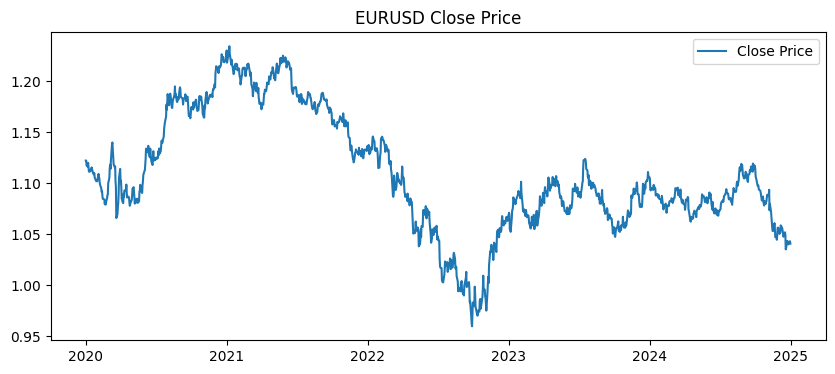

In [ ]:
main_eda()


In [ ]:
main_market_analysis()



=== Step 4: Market Analysis ===
Loaded EURUSD_features.csv with shape (1305, 14)
Columns before cleaning: Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA_20', 'MA_50', 'RSI',
       'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal', 'Returns',
       'Volatility'],
      dtype='object')
First 5 rows before cleaning:
               Close      High       Low      Open  Volume  MA_20  MA_50  \
Date                                                                       
2020-01-01  1.122083  1.122838  1.115947  1.122083       0    NaN    NaN   
2020-01-02  1.122083  1.122712  1.116682  1.121894       0    NaN    NaN   
2020-01-03  1.117144  1.118068  1.112570  1.117081       0    NaN    NaN   
2020-01-06  1.116196  1.120825  1.115810  1.116246       0    NaN    NaN   
2020-01-07  1.119799  1.119946  1.113487  1.119583       0    NaN    NaN   

                  RSI  Bollinger_Upper  Bollinger_Lower      MACD    Signal  \
Date                                                       

In [ ]:
test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds = main_modeling()



=== Step 5: Modeling & Prediction ===
Loaded EURUSD_features.csv with shape (1305, 14)
Columns before cleaning: Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA_20', 'MA_50', 'RSI',
       'Bollinger_Upper', 'Bollinger_Lower', 'MACD', 'Signal', 'Returns',
       'Volatility'],
      dtype='object')
First 5 rows before cleaning:
               Close      High       Low      Open  Volume  MA_20  MA_50  \
Date                                                                       
2020-01-01  1.122083  1.122838  1.115947  1.122083       0    NaN    NaN   
2020-01-02  1.122083  1.122712  1.116682  1.121894       0    NaN    NaN   
2020-01-03  1.117144  1.118068  1.112570  1.117081       0    NaN    NaN   
2020-01-06  1.116196  1.120825  1.115810  1.116246       0    NaN    NaN   
2020-01-07  1.119799  1.119946  1.113487  1.119583       0    NaN    NaN   

                  RSI  Bollinger_Upper  Bollinger_Lower      MACD    Signal  \
Date                                                 

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 48ms/step
LSTM model predictions completed.
LSTM aligned Test DataFrame shape: (242, 14)
Ensemble (ARIMA + Random Forest) predictions completed.
ARIMA        -> RMSE: 0.0245, MAE: 0.0202, R2: -0.8468
RandomForest -> RMSE: 0.0041, MAE: 0.0033, R2: 0.9495
LSTM         -> RMSE: 0.0609, MAE: 0.0506, R2: -10.4029
Ensemble(ARIMA,RF) -> RMSE: 0.0124, MAE: 0.0105, R2: 0.5248


In [ ]:
backtest_results = main_backtest(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds)



=== Step 6: Backtesting Strategies ===

Applying Trend-Following Strategy...
Trend-Following Strategy applied.

=== Backtesting Strategy ===
Trend-Following -> Sharpe: -0.4730, Max DD: 0.0901, CAGR: -0.0293



=== Step 8: Visualization & Reporting ===

=== Prediction Lengths ===
test_df: 242
ARIMA_Predicted: 242
RandomForest_Predicted: 242
LSTM_Predicted: 242
Ensemble_Predicted: 242

Minimum prediction length: 242


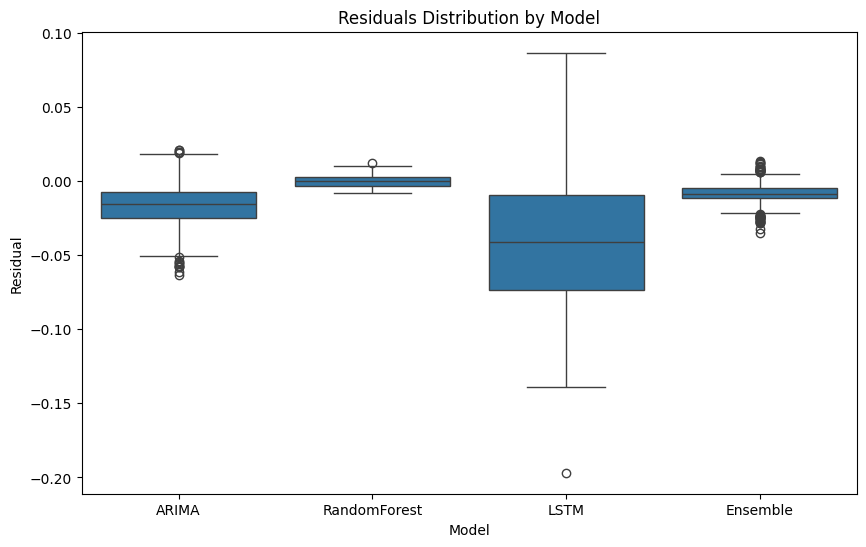

=== Strategy Report ===
Trend-Following Strategy Sharpe Ratio: -0.4730
Trend-Following Strategy Max Drawdown: 0.0901
Trend-Following Strategy CAGR: nan%


In [ ]:
visualization_and_reporting(test_df, arima_preds, rf_preds, lstm_preds, ensemble_preds, backtest_results)
